<a href="https://colab.research.google.com/github/Chaitanyachafle/Credit-Risk-And-Scoring/blob/main/Credit_EDA_And_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'> <font color='grey'><font size=7>💳Case Study💳 <font color="orange"><br><b>💴Credit score Computation💴</font><br>🔎EDA🔍</b></font> </font></h1>

<h2 align='right'>Analysed by : <font color='#fa7f22'><b> Chaitanya </b></font></h2

![image.png](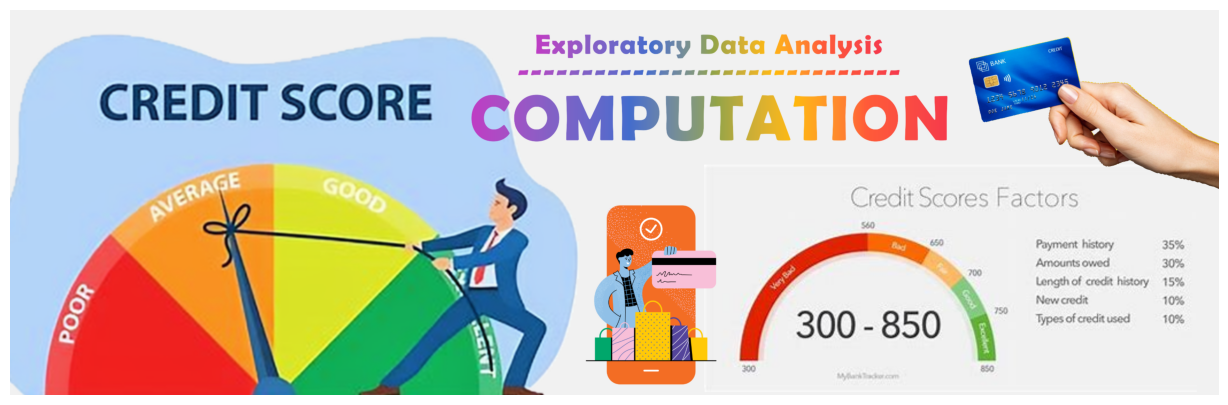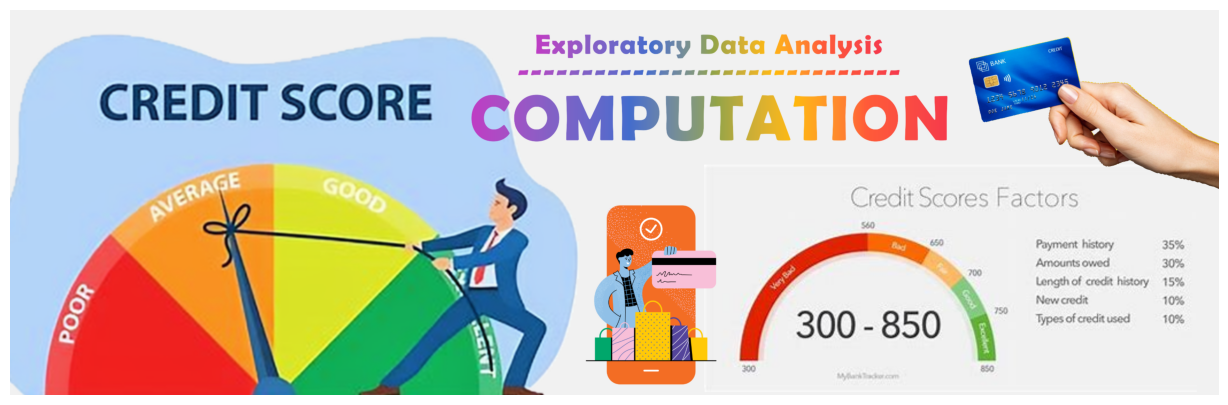)



**Problem Statment**

*  To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.
*   This casestudy expects a deep dive into bank details and credit data, creating valuable features, a hypothetical credit score, and uncovering hidden patterns. This involves thorough EDA, strategic feature engineering, model-driven score calculation, and insightful analysis that reveals factors influencing creditworthiness and guides potential risk mitigation strategies.
*   Remember, your analysis isn't just about dissecting data but uncovering actionable insights. Create a credit score strategy that you think would be the best and mention your justifications for criteria, weightage for the features
*   List item







In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [409]:
data=pd.read_csv('/content/drive/MyDrive/Credit_score.csv')
df=data.copy()


# **Data Wrangling**

In [410]:
df.iloc[:10,:12]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6


In [411]:
df.iloc[:10,12:18]

,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries
0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0
1,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0
2,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0
3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0
4,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0
5,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0
6,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0
7,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0
8,1,Credit-Builder Loan,3,4,5.42,2.0
9,1,Credit-Builder Loan,7,1,7.42,2.0


In [412]:
df.iloc[:10,18:]

,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
5,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118
6,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167
7,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676
8,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269
9,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.5912143


In [413]:
df.fillna(method='ffill',inplace=True)

In [414]:
df.shape

(100000, 27)

In [415]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [416]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4196.144246,17.091280,22.47443,72.466040,21.068780,27.699800,32.285173,1403.118217
std,3187.848468,117.404834,129.05741,466.422621,14.860104,192.881417,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.558333,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3089.544584,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.715000,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [417]:
df.iloc[:10,:12]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

In [419]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [420]:
columns=['Age','Annual_Income','Num_of_Loan','Outstanding_Debt','Num_of_Delayed_Payment','Changed_Credit_Limit','Monthly_Balance']
for col in columns:
   # Remove underscores first
  df[col]=df[col].str.replace('_','')
 # Then convert to float (assuming values are convertible)
  try:
    df[col] = pd.to_numeric(df[col])
  except:
    pass  # Handle cases where conversion fails (optional)


In [421]:
#convert to float
df['Monthly_Balance']=df['Monthly_Balance'].astype('float64')

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [423]:
df.isnull().sum()/len(df) *100

,0
ID,0.000
Customer_ID,0.000
Month,0.000
Name,0.000
Age,0.000
SSN,0.000
Occupation,0.000
Annual_Income,0.000
Monthly_Inhand_Salary,0.000
Num_Bank_Accounts,0.000


In [424]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.629163
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.451310
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.479212
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.565317
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,23.933795,22 Years and 7 Months,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.124168
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.690627
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123783,High_spent_Large_value_payments,484.591214


In [425]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [426]:
#calculating mode of categorical column and replace string with mode
payment_behaviour_mode=df['Payment_Behaviour'].mode().iloc[0]
import re
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace(r'!@9#%8', payment_behaviour_mode)

In [427]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,33113
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425


In [428]:
#Replacing the 'Changed_Credit_Limit' with mean of column
credit_limit_mean=df['Changed_Credit_Limit'].mean()

In [429]:
df['Changed_Credit_Limit'].isnull().sum()
df['Changed_Credit_Limit'].fillna(credit_limit_mean,inplace=True)

In [430]:
df['Changed_Credit_Limit'].isnull().sum()

0

In [431]:
#Replacing the 'NAN' in Monthly_balance with Median of column
balance_median=df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(balance_median,inplace=True)


Column wise Cleaning

In [432]:
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [433]:
numerical_columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Monthly_Balance'],
      dtype='object')

In [434]:
categorical_columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly',
       'Payment_Behaviour'],
      dtype='object')

In [435]:
df.sample()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
62739,0x1859d,CUS_0x610a,April,Johnsonq,52,572-99-2496,Mechanic,22171.25,1638.604167,4,...,0.0,Standard,1195.92,32.416845,16 Years and 5 Months,Yes,53.610741,64.9772681,High_spent_Small_value_payments,305.272408


🕵🏼‍♂️Perfect columns
*   The features ID, Customer_ID, and Month exhibited no redundancy in the dataset.




In [436]:
df[['ID','Customer_ID','Month']]

,ID,Customer_ID,Month
0,0x1602,CUS_0xd40,January
1,0x1603,CUS_0xd40,February
2,0x1604,CUS_0xd40,March
3,0x1605,CUS_0xd40,April
4,0x1606,CUS_0xd40,May
...,...,...,...
99995,0x25fe9,CUS_0x942c,April
99996,0x25fea,CUS_0x942c,May
99997,0x25feb,CUS_0x942c,June
99998,0x25fec,CUS_0x942c,July


1️⃣ Name

In [437]:
df['Name'].dtype

dtype('O')

In [438]:
df.Name.nunique()

10139

In [439]:
df.Name.unique()

array(['Aaron Maashoh', 'Rick Rothackerj', 'Langep', ...,
       'Chris Wickhamm', 'Sarah McBridec', 'Nicks'], dtype=object)

2️⃣ Age

In [440]:
df.Age.nunique()

1728

In [441]:
df.Age.unique()

array([  23, -500,   28, ..., 4808, 2263, 1342])

In [442]:
df.Age.dtype

dtype('int64')

In [443]:
df.Age.min(),df.Age.max()

(-500, 8698)

Age

*   Age contain an outlier need to treat outlier



In [444]:
def fill_mode(series):
    mode_value = series.mode()
    if not mode_value.empty:   ## if mode_value is not none: also works
        return mode_value[0]
    # chances of bimodal values here we consider the first value since year of happening is not mentioned.
    else:
        return np.nan

In [445]:
df['age']=df.groupby('Customer_ID')['Age'].transform(fill_mode)

In [446]:
df.age.nunique() , df.age.unique() , df.age.dtype

(43,
 array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
        32, 48, 43, 36, 16, 18, 42, 22, 19, 15, 27, 38, 14, 25, 45, 47, 17,
        53, 24, 54, 29, 49, 51, 50, 52, 56]),
 dtype('int64'))

In [447]:
df.age.min() , df.age.max()

(14, 56)

In [448]:
df['age'] = df['age'].astype(int)

In [449]:
df.groupby(['Customer_ID','Name'])['age'].unique()

,,age
Customer_ID,Name,
CUS_0x1000,Alistair Barrf,[17]
CUS_0x1009,Arunah,[26]
CUS_0x100b,Shirboni,[18]
CUS_0x1011,Schneyerh,[44]
CUS_0x1013,Cameront,[44]
...,...,...
CUS_0xff3,Somervilled,[55]
CUS_0xff4,Poornimaf,[37]
CUS_0xff6,Shieldsb,[19]


In [450]:
df.age.isna().sum()

0

In [451]:
del df['Age']

##### 🕵🏼‍♂️Insights
* The `Age` feature contained many null and irrelevant values that were affecting the data type. These were addressed by filling in missing values with the most frequent mode. In cases where the mode was bimodal, the first mode value was used.
* The treated feature is `age` and original messed feature has been dropped.

3️⃣ Social-Security-Number

In [452]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age
38035,0xf4dd,CUS_0x1b00,April,Strupczewskih,638-65-2500,Lawyer,59939.52,4721.96,3,5,...,Standard,1338.53,33.411481,31 Years and 6 Months,Yes,0.0,257.9065615,Low_spent_Large_value_payments,484.289439,33


In [453]:
df.SSN.nunique()

12501

In [454]:
df.Customer_ID.nunique()

12500

In [455]:
df[df['SSN']=='#F%$D@*&8']['SSN'].count()

5572

In [456]:
df['SSN']=df['SSN'].replace('#F%$D@*&8',np.nan)

In [457]:
df['SSN'].isna().sum()

5572

In [458]:
df['SSN'] = df.groupby('Customer_ID')['SSN'].ffill()
df['SSN'] = df.groupby('Customer_ID')['SSN'].bfill()

In [459]:
df['SSN'].isna().sum()

0

🕵🏼‍♂️ Insights
The SSN (social security Number) column had some Irrevalant data and it has been treated.

In [460]:
df.Occupation.dtype , df.Occupation.nunique()

(dtype('O'), 16)

In [461]:
df.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [462]:
df[df['Occupation']=='_______']['Occupation'].count()

7062

In [463]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)

In [464]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].ffill()
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].bfill()

In [465]:
df.Occupation.nunique() , df.Occupation.unique()

(15,
 array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
        'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
        'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
       dtype=object))

🕵🏼‍♂️Insights
The Occupation had some irrelavant data and it removed and replaced with relavant values.

5️⃣ Annual_Income

In [466]:
df.Annual_Income.dtype

dtype('float64')

In [467]:
df.Annual_Income.nunique() , df.Annual_Income.unique()

(13613,
 array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
         39628.99]))

🕵🏼‍♂️Insights
The Annual_Income feature, initially in object datatype with some irrelevant data, has been already cleaned and converted to the appropriate numeric format.

6️⃣ Monthly_Inhand_Salary

In [468]:
df['Monthly_Inhand_Salary'].dtype

dtype('float64')

In [469]:
df['Monthly_Inhand_Salary'].isna().sum()

0

7️⃣ Num_Bank_Accounts

In [470]:
df.Num_Bank_Accounts.dtype

dtype('int64')

In [471]:
df.Num_Bank_Accounts.isna().sum()

0

In [472]:
df.Num_Bank_Accounts.nunique()

943

In [473]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].replace(-1,0)

In [474]:
df['Num_Bank_Acc'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(fill_mode)

In [475]:
df['Num_Bank_Acc'].min() , df['Num_Bank_Acc'].max()

(0, 10)

In [476]:
df[df['Name']=='Thomass'][['SSN','Name','Month','Num_Bank_Accounts','Num_Bank_Acc']]

,SSN,Name,Month,Num_Bank_Accounts,Num_Bank_Acc
9488,739-35-4103,Thomass,January,5,5
9489,739-35-4103,Thomass,February,5,5
9490,739-35-4103,Thomass,March,5,5
9491,739-35-4103,Thomass,April,5,5
9492,739-35-4103,Thomass,May,5,5
9493,739-35-4103,Thomass,June,5,5
9494,739-35-4103,Thomass,July,5,5
9495,739-35-4103,Thomass,August,5,5
9496,331-56-3207,Thomass,January,4,4
56729,733-72-3818,Thomass,February,6,6


In [477]:
df.drop(columns=['Num_Bank_Accounts'],inplace=True)

🕵🏼‍♂️Insight


*   The feature Num_Bank_Accounts had many irrelavant data and those have been filled with appropriate values.
*   The New feature named Num_Bank_Acc was created



8️⃣ Num_Credit_Card

In [478]:
df['Num_Credit_Card'].min(),df['Num_Credit_Card'].max()

(0, 1499)

In [479]:
df['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,  955, 1430,  679])

In [480]:
df['Num_Credit_Card'].nunique()

1179

In [481]:
df['Num_Credit_Card'].dtype

dtype('int64')

In [482]:
df['No_of_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(fill_mode)

In [483]:
df[df.Name=='Dolano']

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Credit_Card,Interest_Rate,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card
66464,0x19b72,CUS_0x7666,January,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,4,7,...,27.305788,16 Years and 4 Months,Yes,257.616616,360.6056908,High_spent_Medium_value_payments,583.418026,54,5,4
66465,0x19b73,CUS_0x7666,February,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,4,7,...,37.319840,16 Years and 5 Months,Yes,257.616616,859.4255634,Low_spent_Large_value_payments,104.598154,54,5,4
66466,0x19b74,CUS_0x7666,March,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,18,7,...,35.071993,16 Years and 6 Months,Yes,257.616616,118.1491899,High_spent_Large_value_payments,815.874527,54,5,4
66467,0x19b75,CUS_0x7666,April,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,4,7,...,35.936157,16 Years and 7 Months,Yes,257.616616,334.2680024,High_spent_Medium_value_payments,609.755715,54,5,4
66468,0x19b76,CUS_0x7666,May,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,1089,7,...,27.292384,16 Years and 8 Months,Yes,257.616616,404.0133005,Low_spent_Medium_value_payments,570.010417,54,5,4
66469,0x19b77,CUS_0x7666,June,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,141,7,...,33.103244,16 Years and 9 Months,Yes,257.616616,__10000__,High_spent_Large_value_payments,794.446025,54,5,4
66470,0x19b78,CUS_0x7666,July,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,4,7,...,36.908393,16 Years and 10 Months,Yes,257.616616,484.4120929,High_spent_Small_value_payments,469.611624,54,5,4
66471,0x19b79,CUS_0x7666,August,Dolano,922-59-5950,Entrepreneur,113284.84,9516.403333,4,7,...,28.216688,16 Years and 11 Months,Yes,257.616616,511.2635653,Low_spent_Large_value_payments,452.760152,54,5,4


In [484]:
df['No_of_Credit_Card'].min(),df['No_of_Credit_Card'].max()

(0, 11)

In [485]:
df.drop(columns=['Num_Credit_Card'],inplace=True)

🕵🏼‍♂️Insights
*   The feature Num_Credit_Card had many irrelavant data and it has been filled
with appropriate values.
*   New feature No_of_Credit_Card has created with perfect values


9️⃣ Interest_Rate

In [486]:
df.Interest_Rate.dtype , df.Interest_Rate.nunique() , df.Interest_Rate.unique()

(dtype('int64'), 1750, array([   3,    6,    8, ..., 1347,  387, 5729]))

In [487]:
df.Interest_Rate.min(),df.Interest_Rate.max()

(1, 5797)

In [488]:
df.Interest_Rate.isna().sum()

0

In [489]:
df['interest_rate'] = df.groupby('Customer_ID')['Interest_Rate'].transform(fill_mode)

In [490]:
df[df.Name=='Anna Yukhananovd']

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate
23512,0x9fc6,CUS_0x2fab,January,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,5788,3,...,31 Years and 9 Months,No,141.289448,51.86724209,High_spent_Large_value_payments,658.851143,27,0,1,10
23513,0x9fc7,CUS_0x2fab,February,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,3,...,31 Years and 10 Months,No,141.289448,__10000__,High_spent_Medium_value_payments,587.762726,27,0,1,10
23514,0x9fc8,CUS_0x2fab,March,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,-100,...,31 Years and 11 Months,No,141.289448,49.61176603,High_spent_Large_value_payments,661.106619,27,0,1,10
23515,0x9fc9,CUS_0x2fab,April,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,3,...,32 Years and 0 Months,No,141.289448,81.14376064,High_spent_Medium_value_payments,639.574624,27,0,1,10
23516,0x9fca,CUS_0x2fab,May,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,3,...,32 Years and 1 Months,No,141.289448,485.8331017,Low_spent_Medium_value_payments,264.885283,27,0,1,10
23517,0x9fcb,CUS_0x2fab,June,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,3,...,32 Years and 2 Months,NM,141.289448,161.5290727,Low_spent_Medium_value_payments,589.189312,27,0,1,10
23518,0x9fcc,CUS_0x2fab,July,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,3,...,32 Years and 3 Months,NM,141.289448,104.3770881,High_spent_Medium_value_payments,616.341297,27,0,1,10
23519,0x9fcd,CUS_0x2fab,August,Anna Yukhananovd,411-00-6543,Manager,75804.94,6120.078333,10,3,...,32 Years and 4 Months,NM,141.289448,116.1401403,High_spent_Large_value_payments,594.578244,27,0,1,10


In [491]:
df['interest_rate'].min() , df['interest_rate'].max()

(1, 34)

In [492]:
df.drop(columns=['Interest_Rate'],inplace=True)

In [493]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate
7150,0x3fe4,CUS_0xb956,July,K.T. Arasuv,463-27-1350,Mechanic,139538.32,11455.19333,4,"Credit-Builder Loan, Payday Loan, Auto Loan, a...",...,22 Years and 9 Months,No,255.097261,360.6065078,Low_spent_Medium_value_payments,511.965427,28,2,5,8


🕵🏼‍♂️Insight
1. The feature Interest_Rate had many irrelavant data and those have been filled with appropriate values.
2. The New feature named interest_rate was created

1️⃣0️⃣ Num_of_Lo

In [494]:
df.Num_of_Loan.dtype , df.Num_of_Loan.nunique() , df.Num_of_Loan.unique()

(dtype('int64'),
 414,
 array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
           9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
         720, 1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,
         119,  663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,
        1214,  186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1480,
        1047, 1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,
         995,  545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,
         323, 1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95,
        1353, 1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,
         911, 1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,
         420, 1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,
          23,  238,  638,  138,  235,  280, 1070, 1484,  274,  494, 1459,
         404, 1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,
         961, 1

In [495]:
df.Num_of_Loan.min(),df.Num_of_Loan.max()

(-100, 1496)

In [496]:
def calculate_num_of_loans(type_of_loan):
    if pd.isna(type_of_loan) or type_of_loan.strip() == "":
        return 0
    else:
        return len(type_of_loan.split(','))

In [497]:
df['Num_of_Loan'] = df['Type_of_Loan'].apply(calculate_num_of_loans)

In [498]:
df['Num_of_Loan'].nunique() , df['Num_of_Loan'].unique()

(9, array([4, 1, 3, 2, 7, 5, 6, 8, 9]))

In [499]:
df['Num_of_Loan'].min() , df['Num_of_Loan'].max()

(1, 9)

In [500]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate
62659,0x18525,CUS_0x33ea,April,Grant McCoolg,729-59-5840,Accountant,9566.58,856.215,5,"Home Equity Loan, Mortgage Loan, Payday Loan, ...",...,15 Years and 1 Months,Yes,39.513164,56.18384869,Low_spent_Small_value_payments,279.924487,19,5,7,14


🕵🏼‍♂️Insight
1. The feature Num_of_Loan had many irrelavant data and those have been filled with appropriate values of length of the Type_of_Loan.

1️⃣1️⃣ Type_of_Loan

In [501]:
df.Type_of_Loan.dtype ,df.Type_of_Loan.isna().sum()

(dtype('O'), 0)

In [502]:
df[df.Type_of_Loan.isna()]['Num_of_Loan'].unique()

array([], dtype=int64)

In [503]:
df[df['Name']=='Stempelp'][['Name','SSN','Occupation','Num_of_Loan','Type_of_Loan','interest_rate']]

,Name,SSN,Occupation,Num_of_Loan,Type_of_Loan,interest_rate
512,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
513,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
514,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
515,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
516,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
517,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
518,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
519,Stempelp,878-90-6321,Scientist,7,"Student Loan, Student Loan, Student Loan, Debt...",5
5336,Stempelp,049-48-0823,Media_Manager,3,"Debt Consolidation Loan, Payday Loan, and Mort...",11
5337,Stempelp,049-48-0823,Media_Manager,3,"Debt Consolidation Loan, Payday Loan, and Mort...",11


In [504]:
df.groupby('Type_of_Loan')[['Customer_ID']].count().sort_values(by='Customer_ID',ascending=False)[:12]

,Customer_ID
Type_of_Loan,
Not Specified,1568
Personal Loan,1472
Debt Consolidation Loan,1464
Credit-Builder Loan,1416
Payday Loan,1400
Student Loan,1392
Mortgage Loan,1296
Auto Loan,1272
Home Equity Loan,1248


🕵🏼‍♂️Insights
1. Null values in Type_of_Loan has been filled 'No loan taken'

In [505]:
df['Delay_from_due_date'].isna().sum()

0

In [506]:
df[df['Delay_from_due_date']<0]['Customer_ID'].count()

591

In [507]:
df.loc[df['Delay_from_due_date']<0,'Delay_from_due_date']=0

In [508]:
df['delay_from_due_date'] = df.groupby('Customer_ID')['Delay_from_due_date'].transform(fill_mode)

In [509]:
df['Delay_from_due_date'].nunique() , df['Delay_from_due_date'].unique()

(68,
 array([ 3,  0,  5,  6,  8,  7, 13, 10,  4,  9,  1, 12, 11, 30, 31, 34, 27,
        14,  2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26, 43, 28,
        25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57, 54, 62,
        65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, 63, 40, 37, 66]))

In [510]:
df['delay_from_due_date'].nunique() , df['delay_from_due_date'].unique()

(63,
 array([ 3,  8,  5,  0, 30, 11, 16,  4, 10, 23, 18, 51, 48, 25, 22, 52, 61,
        31, 53, 14, 17,  7, 49,  6, 13, 12, 59,  2, 20, 27, 57, 62, 15, 54,
        50, 41, 19, 24, 29,  1, 36,  9, 46, 60, 26, 33, 34, 28, 35, 38, 21,
        45, 42, 40, 47, 55, 32, 44, 39, 37, 43, 58, 56]))

In [511]:
df['Delay_from_due_date'].min() , df['Delay_from_due_date'].max()

(0, 67)

In [512]:
df['delay_from_due_date'].min() , df['delay_from_due_date'].max()

(0, 62)

In [513]:
df.drop(columns=['Delay_from_due_date'],inplace=True)

🕵🏼‍♂️ Insights
1. Values less than 0 in Delay_from_due_date have been replaced with 'Zero'.
2. On a holistic view, considering the average number of days of delayed payments, the mode has been deemed the most appropriate measure.
3. The range of delayed payment intervals spans from 0 days to 62 days.

1️⃣3️⃣ Num_of_Delayed_Payment

In [514]:
df.Num_of_Delayed_Payment.dtype , df.Num_of_Delayed_Payment.isna().sum()

(dtype('int64'), 0)

In [515]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].replace({'-': np.nan, '_': np.nan}, regex=True)

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [516]:
df.Num_of_Delayed_Payment.dtype , df.Num_of_Delayed_Payment.isna().sum()

(dtype('int64'), 0)

In [517]:
df['No_of_delayed_payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(fill_mode)

In [518]:
df.Num_of_Delayed_Payment.nunique() , df.Num_of_Delayed_Payment.min() , df.Num_of_Delayed_Payment.max()

(711, -3, 4397)

In [519]:
df.No_of_delayed_payment.nunique() , df.No_of_delayed_payment.min() , df.No_of_delayed_payment.max()

(33, -3, 4075)

In [520]:
df.drop(columns=['Num_of_Delayed_Payment'],inplace=True)

In [521]:
df['No_of_delayed_payment'] = df['No_of_delayed_payment'].astype(int)

🕵🏼‍♂️ Insights
1. Irrelavant Values Num_of_Delayed_Payment have been replaced with 'Nulls'.
2. On a holistic view, considering the average number of delayed payments, the mode has been deemed the most appropriate measure.


1️⃣️4️⃣ Changed_Credit_Limt
1. Represents the percentage change in credit card limit

In [522]:
df.Changed_Credit_Limit.dtype

dtype('float64')

In [523]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')

In [524]:
df.Changed_Credit_Limit.min() , df.Changed_Credit_Limit.max() , df.Changed_Credit_Limit.isna().sum()

(-6.49, 36.97, 0)

In [525]:
df.Changed_Credit_Limit.min() , df.Changed_Credit_Limit.max() , df.Changed_Credit_Limit.isna().sum()

(-6.49, 36.97, 0)

🕵🏼‍♂️ Insights
1. Irrelavant Values in Changed_Credit_Limit have been replaced with 'Nulls' and treated by filling the values.
For percentage changes, it's quite common to have negative values. A negative percentage indicates a decrease in the credit card limit, while a positive percentage indicates an increase.
Here’s a quick overview of what the range of -6.49 to 36.97 could represent:

2. Negative Values (-6.49 to 0): This range indicates a decrease in the credit card limit. For example, a value of -0.01 could mean a decrease of 1% in the credit limit.

3. Positive Values (0 to 36.97): This range indicates an increase in the credit card limit. For example, a value of 36.97 could mean an increase of 36.97% in the credit limit.

4. The range -6.49 to 36.97 suggests that the changes span from a small decrease to a significant increase in credit card limits.

#### 15. Num_Credit_Inquiries

In [526]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment
90578,0x228bc,CUS_0xc5a5,March,Patrane,493-76-9159,Manager,35611.71,3255.6425,5,"Not Specified, Mortgage Loan, Payday Loan, Hom...",...,0.0,400.563455,Low_spent_Small_value_payments,215.000795,33,4,6,2,10,10


In [527]:
df.Num_Credit_Inquiries.dtype , df.Num_Credit_Inquiries.isna().sum()

(dtype('float64'), 0)

In [528]:
df['No_of_credit_inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(fill_mode)

In [529]:
df.No_of_credit_inquiries.dtype , df.No_of_credit_inquiries.isna().sum()

(dtype('float64'), 0)

In [530]:
df['No_of_credit_inquiries'] = df['No_of_credit_inquiries'].astype(int)

In [531]:
df.No_of_credit_inquiries.min() , df.No_of_credit_inquiries.max()

(0, 17)

In [532]:
df[df.No_of_credit_inquiries==17].sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries
87195,0x214e9,CUS_0xa1ab,April,Langen,399-75-1500,Lawyer,40561.2,3616.1,8,"Auto Loan, Student Loan, Mortgage Loan, Auto L...",...,42.33562223,High_spent_Large_value_payments,369.876918,35,9,6,28,60,17,17


In [533]:
df.drop(columns=['Num_Credit_Inquiries'],inplace=True)

🕵🏼‍♂️ Insights
1. Irrelavant Values Num_Credit_Inquiries have been filled with the mode in new feature called No_of_credit_inquiries , which was the most appropriate measure.
2. The range of No_of_credit_inquiries intervals spans from 0 days to 17 inquires on an average.

1️⃣5️⃣ Credit_Mix

In [534]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries
23480,0x9f96,CUS_0x290d,January,Jan Harveyf,253-26-9261,Architect,34791.08,3151.256667,3,"Credit-Builder Loan, Student Loan, and Credit-...",...,274.8453883,Low_spent_Medium_value_payments,234.733661,23,6,6,9,21,19,1


In [535]:
df[df.Credit_Mix=='_'].count()[0]

20195

In [536]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)

In [537]:
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].ffill()
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].bfill()

In [538]:
df[df.Credit_Mix=='_'].count()[0]

0

In [539]:
df[df.Name=='Bansalp']

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries
68704,0x1a892,CUS_0xae9e,January,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,25.75450602,High_spent_Large_value_payments,334.098829,17,8,9,26,60,20,6
68705,0x1a893,CUS_0xae9e,February,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,189.0987944,Low_spent_Small_value_payments,220.754541,17,8,9,26,60,20,6
68706,0x1a894,CUS_0xae9e,March,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,141.2465045,Low_spent_Small_value_payments,268.606831,17,8,9,26,60,20,6
68707,0x1a895,CUS_0xae9e,April,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,150.5669911,Low_spent_Small_value_payments,259.286344,17,8,9,26,60,20,6
68708,0x1a896,CUS_0xae9e,May,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,22.13508597,High_spent_Medium_value_payments,347.718249,17,8,9,26,60,20,6
68709,0x1a897,CUS_0xae9e,June,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,22.13508597,Low_spent_Medium_value_payments,203.915296,17,8,9,26,60,20,6
68710,0x1a898,CUS_0xae9e,July,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,81.61927422,High_spent_Small_value_payments,298.234061,17,8,9,26,60,20,6
68711,0x1a899,CUS_0xae9e,August,Bansalp,345-91-4839,Developer,19540.67,1891.389167,6,"Not Specified, Mortgage Loan, Debt Consolidati...",...,248.7747291,Low_spent_Small_value_payments,161.078606,17,8,9,26,60,20,6


🕵🏼‍♂️ Insights
1. Irrelavant Values in Credit_Mix have been replaced with 'Nulls' and then treated by filling the appropriate values

#### 1️⃣6️⃣ Outstanding_Debt

In [540]:
df.Outstanding_Debt.dtype

dtype('float64')

In [541]:
df.Outstanding_Debt.nunique() , df.Outstanding_Debt.unique()

(12203, array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38]))

In [542]:
df['Outstanding_Debt'] = df.Outstanding_Debt.replace(r'/d+_$',np.nan,regex=True)
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [543]:
df.Outstanding_Debt.nunique() , df.Outstanding_Debt.unique()

(12203, array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38]))

In [544]:
df['Outstanding_Debt'] = df.groupby('Customer_ID')['Outstanding_Debt'].ffill()
df['Outstanding_Debt'] = df.groupby('Customer_ID')['Outstanding_Debt'].bfill()

In [545]:
df.Outstanding_Debt.nunique() , df.Outstanding_Debt.unique()

(12203, array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38]))

In [546]:
df.Outstanding_Debt.min() , df.Outstanding_Debt.max()

(0.23, 4998.07)

In [547]:
df.Outstanding_Debt.isna().sum()

0

#### 1️⃣7️⃣ Credit_Utilization_Ratio

In [548]:
df.Credit_Utilization_Ratio.dtype , df.Credit_Utilization_Ratio.isna().sum()

(dtype('float64'), 0)

##### 🕵🏼‍♂️ Insights

* No Irrelavant Values in `Credit_Utilization_Ratio` have been found.

#### 1️⃣8️⃣ Credit_History_Age
- Represents the age of credit history of the person

In [549]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries
54997,0x1583f,CUS_0x3139,June,Scheyderk,490-80-5398,Accountant,19369.96,1791.163333,4,"Payday Loan, Debt Consolidation Loan, Credit-B...",...,48.47119199,High_spent_Medium_value_payments,323.232929,18,6,5,18,14,18,8


In [550]:
df.head(1)

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries
0,0x1602,CUS_0xd40,January,Aaron Maashoh,821-00-0265,Scientist,19114.12,1824.843333,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,80.41529544,High_spent_Small_value_payments,312.494089,23,3,4,3,3,4,4


In [551]:
df.Credit_History_Age.isna().sum()

0

In [552]:
df['Credit_History_Age'] = df['Credit_History_Age'].replace('NA',np.nan)

In [553]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].ffill()
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].bfill()

In [554]:
df['cha'] = df.Credit_History_Age.str.split(' ')
df['cha1'] = df['cha'].apply(lambda x: x[0])

In [555]:
df['cha'] , df['cha1']

(0         [22, Years, and, 1, Months]
 1         [22, Years, and, 1, Months]
 2         [22, Years, and, 3, Months]
 3         [22, Years, and, 4, Months]
 4         [22, Years, and, 5, Months]
                      ...             
 99995     [31, Years, and, 6, Months]
 99996     [31, Years, and, 7, Months]
 99997     [31, Years, and, 8, Months]
 99998     [31, Years, and, 9, Months]
 99999    [31, Years, and, 10, Months]
 Name: cha, Length: 100000, dtype: object,
 0        22
 1        22
 2        22
 3        22
 4        22
          ..
 99995    31
 99996    31
 99997    31
 99998    31
 99999    31
 Name: cha1, Length: 100000, dtype: object)

In [556]:
df['cha1'] = df.cha1.astype(int)

In [557]:
df['credit_history_age'] = df.groupby('Customer_ID')['cha1'].transform(max)

In [558]:
df[df.Customer_ID=='CUS_0xff3']

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries,cha,cha1,credit_history_age
5168,0x344a,CUS_0xff3,January,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[16, Years, and, 9, Months]",16,17
5169,0x344b,CUS_0xff3,February,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[16, Years, and, 10, Months]",16,17
5170,0x344c,CUS_0xff3,March,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[16, Years, and, 11, Months]",16,17
5171,0x344d,CUS_0xff3,April,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[17, Years, and, 0, Months]",17,17
5172,0x344e,CUS_0xff3,May,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[17, Years, and, 1, Months]",17,17
5173,0x344f,CUS_0xff3,June,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[17, Years, and, 2, Months]",17,17
5174,0x3450,CUS_0xff3,July,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[17, Years, and, 3, Months]",17,17
5175,0x3451,CUS_0xff3,August,Somervilled,726-35-5322,Scientist,17032.785,1176.39875,3,"Personal Loan, Mortgage Loan, and Auto Loan",...,55,0,6,2,13,9,5,"[17, Years, and, 3, Months]",17,17


In [559]:
df.drop(columns=['cha','cha1','Credit_History_Age'],inplace=True)

In [560]:
df.groupby('Customer_ID')['credit_history_age'].first()

,credit_history_age
Customer_ID,
CUS_0x1000,10
CUS_0x1009,31
CUS_0x100b,15
CUS_0x1011,15
CUS_0x1013,17
...,...
CUS_0xff3,17
CUS_0xff4,18
CUS_0xff6,24


In [561]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries,credit_history_age
97843,0x2534d,CUS_0xc436,April,Rachelle Younglaid,512-83-3982,Accountant,31767.33,2709.2775,1,Not Specified,...,Low_spent_Large_value_payments,347.399042,15,5,3,19,21,15,10,33


##### 🕵🏼‍♂️ Insights

* Irrelavant Values in `Credit_History_Age` has been replaced with appropriate values.
* We just need the ***years of Credit*** as Age, which has created in `credit_history_age`
* Note: If the customer's age is closer to his/her credit_History_Age it maybe due to 'Inherited_Credit_History'

#### 1️⃣9️⃣ Payment_of_Min_Amount

In [562]:
df.Payment_of_Min_Amount.isna().sum()

0

In [563]:
df.Payment_of_Min_Amount.nunique() , df.Payment_of_Min_Amount.unique()

(3, array(['No', 'NM', 'Yes'], dtype=object))

In [564]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM','No')

In [565]:
df.Payment_of_Min_Amount.isna().sum() , df.Payment_of_Min_Amount.nunique() , df.Payment_of_Min_Amount.unique()

(0, 2, array(['No', 'Yes'], dtype=object))

##### 🕵🏼‍♂️ Insights

* Irrelavant Values in `Payment_of_Min_Amount` has been replaced with appropriate values.

In [566]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries,credit_history_age
52533,0x149cf,CUS_0x442b,June,Evag,710-88-0178,Scientist,78749.9,6433.491667,2,"Not Specified, and Auto Loan",...,High_spent_Large_value_payments,636.485827,48,0,5,5,10,5,4,31


#### 2️⃣0️⃣ Total_EMI_per_month

In [567]:
df.Total_EMI_per_month.dtype , df.Total_EMI_per_month.isna().sum()

(dtype('float64'), 0)

In [568]:
df.Total_EMI_per_month.nunique() , df.Total_EMI_per_month.unique()

(14950,
 array([4.95749492e+01, 1.88162146e+01, 2.46992320e+02, ...,
        1.21120000e+04, 3.51040226e+01, 5.86380000e+04]))

##### 🕵🏼‍♂️ Insights

* No Irrelavant Values in `Total_EMI_per_month` have been found.

#### 2️⃣1️⃣ Amount_invested_monthly

In [569]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries,credit_history_age
88117,0x21a4f,CUS_0x6683,June,Yoshifumic,368-69-9911,Developer,32653.78,2506.148333,5,"Debt Consolidation Loan, Personal Loan, Home E...",...,High_spent_Medium_value_payments,346.564313,20,5,7,7,17,19,7,15


In [570]:
df.Amount_invested_monthly.dtype

dtype('O')

In [571]:
df.loc[df['Amount_invested_monthly'] == '__10000__', 'Amount_invested_monthly'] = 0

In [572]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [573]:
df.Amount_invested_monthly.dtype

dtype('float64')

In [574]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)

In [575]:
df['Amount_invested_monthly'].isna().sum()

0

##### 🕵🏼‍♂️ Insights

* Irrelavant Values in `Amount_invested_monthly` has been filled with appropriate values.

#### 2️⃣2️⃣ Payment_Behaviour

In [576]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries,credit_history_age
52809,0x14b6f,CUS_0x7f3,February,Poornimac,276-64-8276,Developer,39420.54,3389.045,7,"Student Loan, Personal Loan, Personal Loan, Pe...",...,Low_spent_Medium_value_payments,114.780856,30,6,8,33,25,19,10,20


In [577]:
df['Payment_Behaviour'] = df.Payment_Behaviour.replace('!@9#%8',np.nan)

In [578]:
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].ffill()
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].bfill()

In [579]:
df['Payment_Behaviour'].isna().sum()

0

##### 🕵🏼‍♂️ Insights

* Irrelavant Values in `Payment_Behaviour` has been filled with appropriate values.

#### 2️⃣3️⃣ Monthly_Balance

In [580]:
df.sample()

,ID,Customer_ID,Month,Name,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Type_of_Loan,...,Payment_Behaviour,Monthly_Balance,age,Num_Bank_Acc,No_of_Credit_Card,interest_rate,delay_from_due_date,No_of_delayed_payment,No_of_credit_inquiries,credit_history_age
30373,0xc7f7,CUS_0xa65,June,Longstrethz,156-18-7147,Architect,51647.07,4305.9225,3,"Debt Consolidation Loan, Credit-Builder Loan, ...",...,High_spent_Small_value_payments,342.680104,45,6,8,19,48,12,11,10


In [581]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'],errors='coerce')

In [582]:
df['Monthly_Balance'].isna().sum()

0

In [583]:
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)

##### 🕵🏼‍♂️Insights

* Datatype of `Monthly_Balance` has be changed and filled null with 'Zero' as corresponding Monthly_Balance.

**🪜Restructuring the Data:**

In [584]:
rename_dict = {
    'Num_Bank_Acc': 'Num_Bank_Accounts',
    'No_of_Credit_Card': 'Num_Credit_Card',
    'interest_rate': 'Interest_Rate',
    'delay_from_due_date': 'Delay_from_due_date',
    'No_of_delayed_payment': 'Num_of_Delayed_Payment',
    'No_of_credit_inquiries': 'Num_Credit_Inquiries',
    'credit_history_age': 'Credit_History_Age',
    'age': 'Age'
}

df = df.rename(columns=rename_dict)


new_column_order = [
    'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
    'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
    'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
    'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'
]

df = df.reindex(columns=new_column_order)

df.tail(8)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
99992,0x25fe6,CUS_0x942c,January,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,32.991333,31,No,35.104023,401.196481,Low_spent_Small_value_payments,336.710154
99993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,29.135447,31,No,58638.000000,180.733095,Low_spent_Medium_value_payments,336.710154
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,39.323569,31,No,35.104023,140.581403,High_spent_Medium_value_payments,336.710154
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,34.663572,31,No,35.104023,60.971333,High_spent_Large_value_payments,336.710154
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,40.565631,31,No,35.104023,54.185950,High_spent_Medium_value_payments,336.710154
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,41.255522,31,No,35.104023,24.028477,High_spent_Large_value_payments,336.710154
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,33.638208,31,No,35.104023,251.672582,Low_spent_Large_value_payments,336.710154
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3,Good,502.38,34.192463,31,No,35.104023,167.163865,Low_spent_Small_value_payments,336.710154


📂Saving the Cleaned Data

In [586]:
df.to_csv('cleaned_credit_data.csv',index=False)

# **📒 Data Exploration**

In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [588]:
df = pd.read_csv('cleaned_credit_data.csv')

In [589]:
pd.set_option('display.max_columns',50)

# 🕵️‍♂️Exploratory Data Analysis
📰Non Graphical analysis

In [590]:
df['Month_Num'] = pd.to_datetime(df['Month'], format='%B').dt.month
df.sample()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_Num
81295,0x1f255,CUS_0x87f9,August,Reidl,44,472-75-9857,Teacher,20397.855,1690.82125,1,3,8,1,Payday Loan,18,3,5.04,6,Good,961.39,38.316922,22,No,9.816434,97.592424,Low_spent_Medium_value_payments,341.673267,8


# **🖇️Info on Data**

In [591]:
# Checking the number of rows and columns
print(f"No of rows: {df.shape[0]:,} \nNo of columns: {df.shape[1]}")

No of rows: 100,000 
No of columns: 28


In [592]:
# Check all column names
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Month_Num'],
      dtype='object')

In [593]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

# 📝 Statistical Summary

In [595]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,3.327456e+01,1.076444e+01,1.400000e+01,24.000000,33.000000,42.000000,5.600000e+01
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4.196144e+03,3.187848e+03,3.036454e+02,1625.558333,3089.544584,5957.715000,1.520463e+04
Num_Bank_Accounts,100000.0,5.367840e+00,2.592597e+00,0.000000e+00,3.000000,5.000000,7.000000,1.000000e+01
Num_Credit_Card,100000.0,5.532720e+00,2.067504e+00,0.000000e+00,4.000000,5.000000,7.000000,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000e+00,7.000000,13.000000,20.000000,3.400000e+01
Num_of_Loan,100000.0,3.990240e+00,2.222025e+00,1.000000e+00,2.000000,4.000000,6.000000,9.000000e+00
Delay_from_due_date,100000.0,2.105056e+01,1.476119e+01,0.000000e+00,10.000000,18.000000,28.000000,6.200000e+01
Num_of_Delayed_Payment,100000.0,1.358408e+01,3.685367e+01,-3.000000e+00,9.000000,14.000000,18.000000,4.075000e+03
Changed_Credit_Limit,100000.0,1.038903e+01,6.718136e+00,-6.490000e+00,5.420000,9.560000,14.660000,3.697000e+01


In [596]:
df.describe(include=object)

,ID,Customer_ID,Month,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,12500,8,10139,12500,15,6260,3,2,6
top,0x1602,CUS_0xd40,January,Jessicad,821-00-0265,Lawyer,Not Specified,Standard,Yes,Low_spent_Small_value_payments
freq,1,8,12500,49,8,7096,1568,45848,52326,33113


# 🥨Duplicate Detection

In [597]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_Num


🕵🏼‍♂️Insights
No duplicates found

In [598]:
# Number of unique values in each coluumn
print("No.of unique values in each column:")
print("-" * 35)
# Calculate the maximum column name length for formatting
max_col_name_length = max(len(col) for col in df.columns)

for col in df.columns:
    # Use ljust to align the column names and rjust for the counts
    print(f"{col.ljust(max_col_name_length)}: {str(df[col].nunique()).rjust(5)}")

No.of unique values in each column:
-----------------------------------
ID                      : 100000
Customer_ID             : 12500
Month                   :     8
Name                    : 10139
Age                     :    43
SSN                     : 12500
Occupation              :    15
Annual_Income           : 13613
Monthly_Inhand_Salary   : 13235
Num_Bank_Accounts       :    11
Num_Credit_Card         :    12
Interest_Rate           :    34
Num_of_Loan             :     9
Type_of_Loan            :  6260
Delay_from_due_date     :    63
Num_of_Delayed_Payment  :    33
Changed_Credit_Limit    :  3635
Num_Credit_Inquiries    :    18
Credit_Mix              :     3
Outstanding_Debt        : 12203
Credit_Utilization_Ratio: 99998
Credit_History_Age      :    34
Payment_of_Min_Amount   :     2
Total_EMI_per_month     : 14950
Amount_invested_monthly : 91048
Payment_Behaviour       :     6
Monthly_Balance         : 97123
Month_Num               :     8


In [599]:
categorical_columns[1:]

Index(['Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan',
       'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [600]:
numerical_columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Month_Num'],
      dtype='object')

In [607]:
# Creating a dictionary for aggregation at Customer_ID level
agg_dict = {
    'ID': 'first',
     # Grouped by on Customer_ID so not included
    'Name': 'first',
    'Age': 'first',
    'SSN': 'first',
    'Occupation': 'first',
    'Annual_Income': 'first',
    'Monthly_Inhand_Salary': 'first',
    'Num_Bank_Accounts': 'first',
    'Num_Credit_Card': 'first',
    'Interest_Rate': 'first',
    'Num_of_Loan': 'first',
    'Type_of_Loan': 'first',
    'Delay_from_due_date': 'mean',
    'Num_of_Delayed_Payment': 'first',
    'Changed_Credit_Limit': 'mean',
    'Num_Credit_Inquiries': 'first',
    'Credit_Mix': 'first',
    'Outstanding_Debt': 'first',
    'Credit_Utilization_Ratio': 'mean',
    'Credit_History_Age': 'first',
    'Payment_of_Min_Amount': 'first',
    'Total_EMI_per_month': 'first',
    'Amount_invested_monthly': 'mean',
    # Payment_Behaviour not included
    # if needed introduce above and do mean
    #'Payment_History_Score':'mean',
    'Monthly_Balance': 'mean',

}
df_aggregated = df.groupby('Customer_ID').agg(agg_dict).reset_index()
df_aggregated

,Customer_ID,ID,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,CUS_0x1000,0x1628a,Alistair Barrf,17,913-74-1218,Lawyer,30625.940,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62.0,25,1.880000,11,Bad,1562.91,33.477546,10,Yes,42.941090,158.549735,335.375341
1,CUS_0x1009,0x66a2,Arunah,26,063-67-6938,Mechanic,52312.680,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",8.0,18,9.730000,2,Standard,202.68,29.839984,31,No,108.366467,146.679378,428.743155
2,CUS_0x100b,0x1ef6,Shirboni,18,238-62-0395,Media_Manager,113781.390,9549.782500,1,4,1,3,"Student Loan, Home Equity Loan, and Mortgage Loan",14.0,7,10.846128,1,Good,1030.20,34.841449,15,No,0.000000,461.742901,781.229776
3,CUS_0x1011,0x17646,Schneyerh,44,793-05-8223,Doctor,58918.470,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27.0,15,14.170000,7,Standard,473.14,27.655897,15,Yes,123.434939,272.178300,332.642837
4,CUS_0x1013,0x243ea,Cameront,44,930-49-9615,Mechanic,98620.980,612.232500,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12.0,9,1.705000,3,Good,1233.51,31.933940,17,No,228.018084,355.442408,472.781009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,0x344a,Somervilled,55,726-35-5322,Scientist,17032.785,1176.398750,0,6,2,3,"Personal Loan, Mortgage Loan, and Auto Loan",13.0,9,8.485000,5,Good,1229.08,32.889398,17,No,33.299764,83.918549,271.671562
12496,CUS_0xff4,0x16aa,Poornimaf,37,655-05-7666,Entrepreneur,25546.260,2415.855000,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16.0,10,8.205000,5,Standard,758.44,32.598257,18,No,101.328637,152.775690,259.981173
12497,CUS_0xff6,0xfab6,Shieldsb,19,541-92-8371,Doctor,117639.920,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1.0,4,11.900000,2,Good,338.30,33.258053,24,No,126.638453,535.239091,603.570669
12498,CUS_0xffc,0x61e6,Brads,17,226-86-7294,Musician,60877.170,5218.097500,6,8,27,8,"Credit-Builder Loan, Payday Loan, Not Specifie...",46.0,16,9.016128,13,Bad,1300.13,34.722108,13,Yes,272.809169,136.651352,339.951771


In [608]:
categorical_cols = df_aggregated.select_dtypes(include=['object', 'category'])

In [609]:
categorical_cols

,Customer_ID,ID,Name,SSN,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount
0,CUS_0x1000,0x1628a,Alistair Barrf,913-74-1218,Lawyer,"Credit-Builder Loan, and Home Equity Loan",Bad,Yes
1,CUS_0x1009,0x66a2,Arunah,063-67-6938,Mechanic,"Not Specified, Home Equity Loan, Credit-Builde...",Standard,No
2,CUS_0x100b,0x1ef6,Shirboni,238-62-0395,Media_Manager,"Student Loan, Home Equity Loan, and Mortgage Loan",Good,No
3,CUS_0x1011,0x17646,Schneyerh,793-05-8223,Doctor,"Student Loan, Credit-Builder Loan, and Debt Co...",Standard,Yes
4,CUS_0x1013,0x243ea,Cameront,930-49-9615,Mechanic,"Student Loan, Debt Consolidation Loan, and Per...",Good,No
...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,0x344a,Somervilled,726-35-5322,Scientist,"Personal Loan, Mortgage Loan, and Auto Loan",Good,No
12496,CUS_0xff4,0x16aa,Poornimaf,655-05-7666,Entrepreneur,"Not Specified, Student Loan, Student Loan, Cre...",Standard,No
12497,CUS_0xff6,0xfab6,Shieldsb,541-92-8371,Doctor,"Home Equity Loan, and Auto Loan",Good,No
12498,CUS_0xffc,0x61e6,Brads,226-86-7294,Musician,"Credit-Builder Loan, Payday Loan, Not Specifie...",Bad,Yes


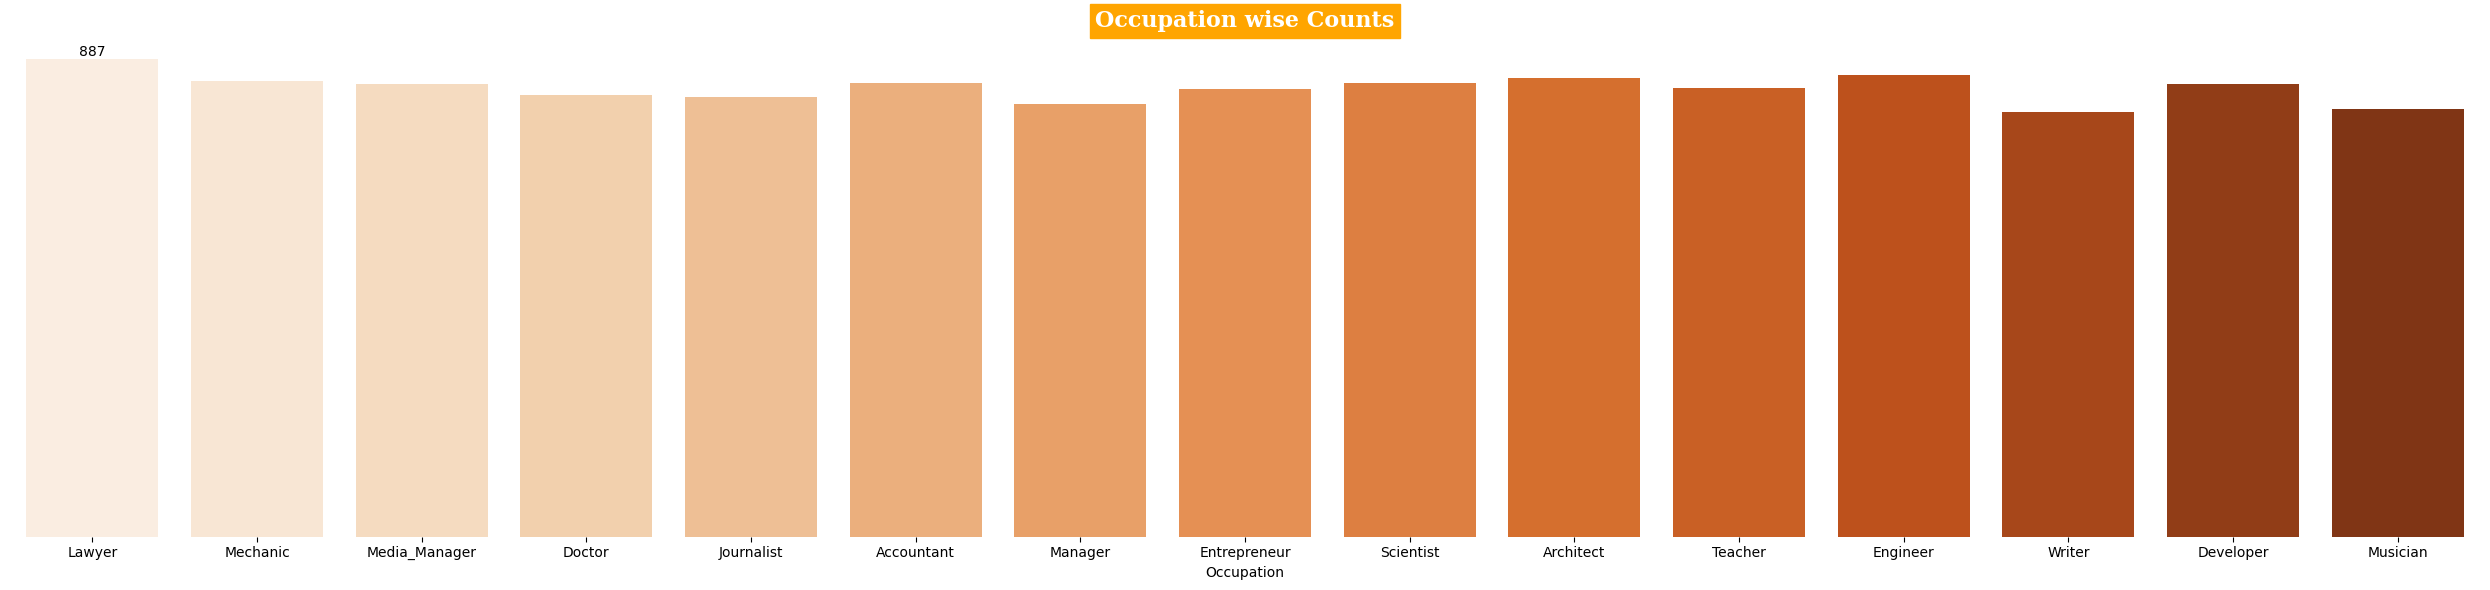

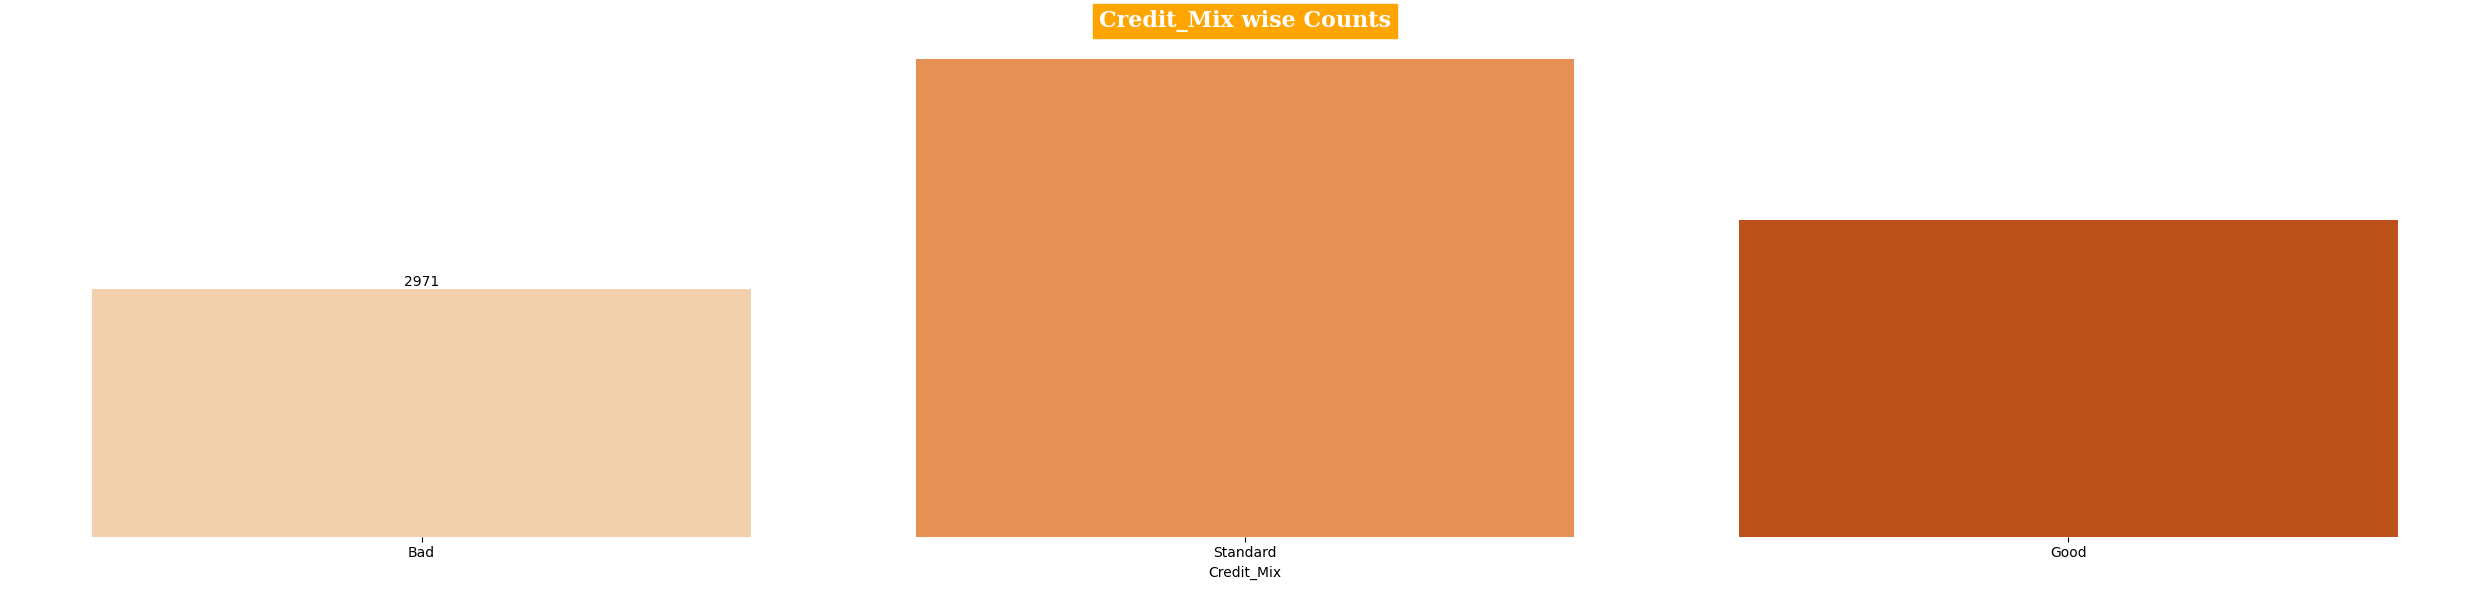

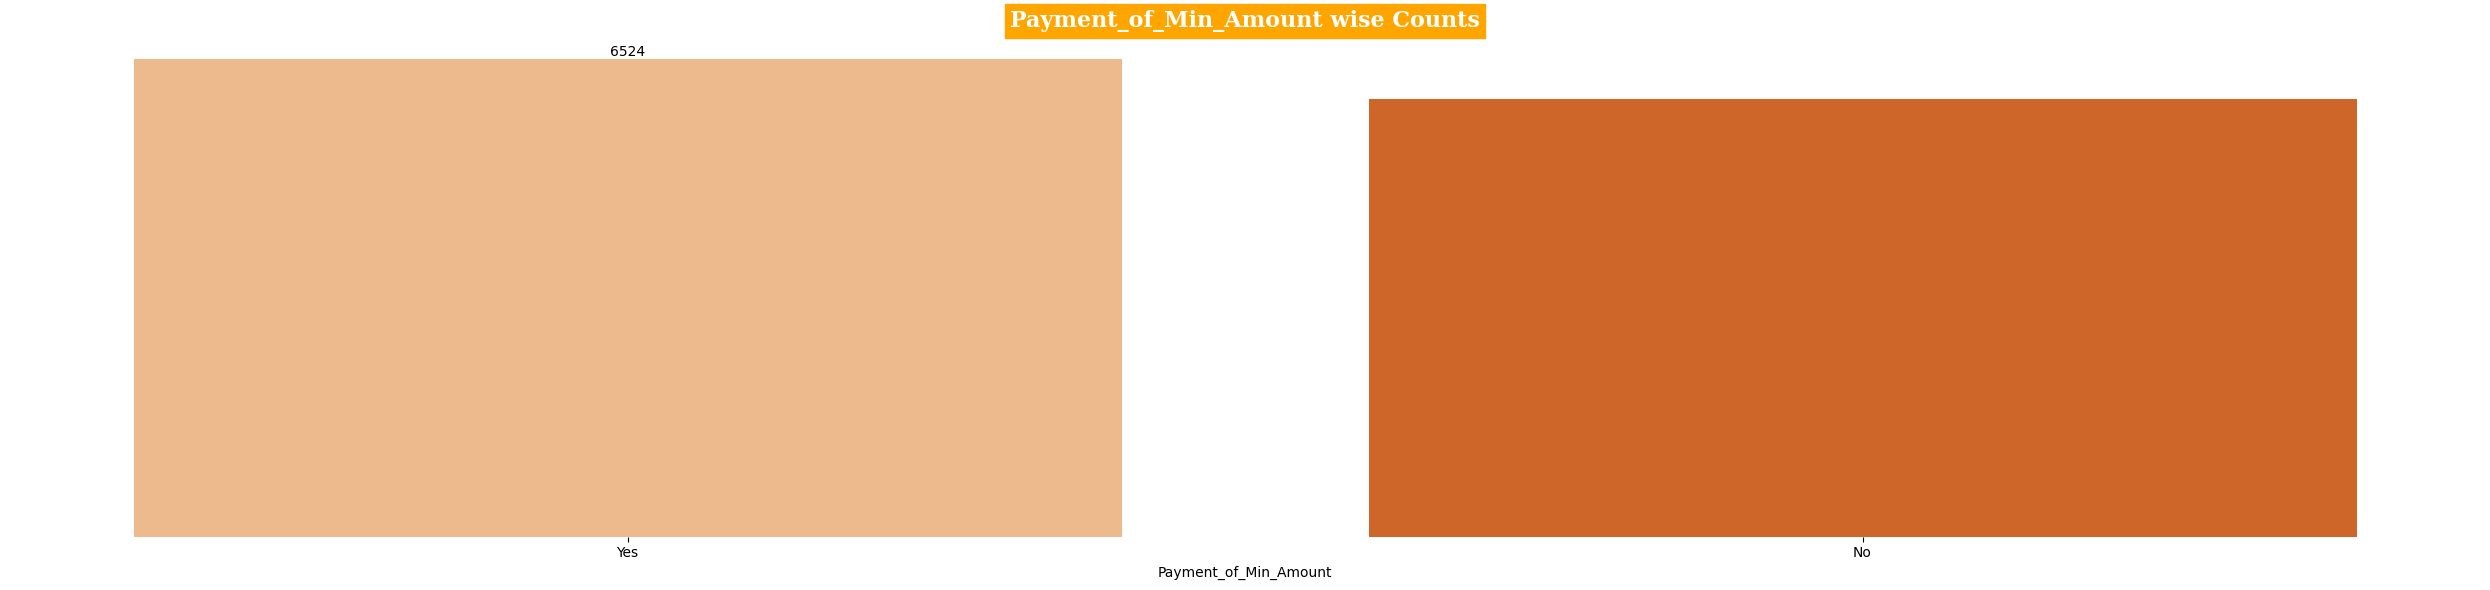

In [610]:
selected_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

for col in selected_cols:
    plt.figure(figsize=(25, 6))
    plt.style.use('default')
    plt.style.use('seaborn-bright')
    a = sns.countplot(data=categorical_cols, x=col, palette='Oranges')
    plt.title(f'{col} wise Counts', fontsize=16, fontfamily='serif', fontweight='bold', backgroundcolor='orange', color='w')
    a.bar_label(a.containers[0], label_type='edge')
    sns.despine(left=True, bottom=True)
    plt.yticks([])
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

### 📉Skewness

In [611]:
# Skewness Coefficient
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
print("Skewness Coefficient")
print("-" * 20)
df.skew(numeric_only = True)
#print(numerical_cols.skew().round(4))

Skewness Coefficient
--------------------


,0
Age,0.157656
Annual_Income,12.512173
Monthly_Inhand_Salary,1.129664
Num_Bank_Accounts,-0.189184
Num_Credit_Card,0.225830
Interest_Rate,0.496232
Num_of_Loan,0.561388
Delay_from_due_date,0.985874
Num_of_Delayed_Payment,107.074462
Changed_Credit_Limit,0.645567


##### 🕵🏼‍♂️Insights

**Highly Skewed Variables**:
   - **Annual_Income** (12.3914), **Total_EMI_per_month** (7.1025), and **Amount_invested_monthly** (2.5489) are highly positively skewed. This suggests that a small number of customers have significantly higher values in these categories compared to the rest, indicating the presence of outliers or a long tail in the distribution.
  
**Moderately Skewed Variables**:
   - **Outstanding_Debt** (1.2075), **Monthly_Balance** (1.4986), and **Monthly_Inhand_Salary** (1.1285) show moderate positive skewness, indicating that while the majority of values are lower, there are some customers with considerably higher values, leading to a rightward tail in the distribution.

**Nearly Symmetrical and Slightly Skewed Variables**:
   - Variables like **Age** (0.1570), **Num_Bank_Accounts** (-0.1892), and **Credit_History_Age** (-0.0490) exhibit low skewness, meaning their distributions are more symmetrical with values evenly spread around the mean. This suggests a more uniform distribution without significant outliers or tails.

In [612]:
numerical_cols.corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.006343,0.088120,-0.190857,-0.148665,-0.217841,-0.177199,-0.175087,-0.034866,-0.155608,-0.257639,-0.202274,0.025508,0.224046,0.001663,0.053072,-0.001717
Annual_Income,0.006343,1.000000,0.029199,-0.009194,-0.001965,-0.006702,-0.002649,-0.010373,-0.002250,0.000606,-0.009433,-0.003706,0.010316,-0.000509,-0.000248,0.019983,0.000818
Monthly_Inhand_Salary,0.088120,0.029199,1.000000,-0.275529,-0.211481,-0.294973,-0.213499,-0.245536,-0.052508,-0.169695,-0.274176,-0.262828,0.171858,0.250127,0.008136,0.579605,-0.000867
Num_Bank_Accounts,-0.190857,-0.009194,-0.275529,1.000000,0.442384,0.584456,0.418915,0.564061,0.111848,0.327673,0.523524,0.507042,-0.071864,-0.461249,-0.006337,-0.170019,0.005005
Num_Credit_Card,-0.148665,-0.001965,-0.211481,0.442384,1.000000,0.497921,0.373896,0.483052,0.061564,0.250502,0.463545,0.490266,-0.055353,-0.394695,-0.006683,-0.132787,0.001425
Interest_Rate,-0.217841,-0.006702,-0.294973,0.584456,0.497921,1.000000,0.489977,0.592943,0.092175,0.363030,0.639231,0.629414,-0.075700,-0.549408,-0.005090,-0.183010,0.003713
Num_of_Loan,-0.177199,-0.002649,-0.213499,0.418915,0.373896,0.489977,1.000000,0.452533,0.063747,0.322348,0.494067,0.585100,-0.075623,-0.507148,0.001130,-0.133581,0.003279
Delay_from_due_date,-0.175087,-0.010373,-0.245536,0.564061,0.483052,0.592943,0.452533,1.000000,0.086269,0.292124,0.548683,0.575419,-0.063895,-0.469727,-0.003774,-0.154247,0.004460
Num_of_Delayed_Payment,-0.034866,-0.002250,-0.052508,0.111848,0.061564,0.092175,0.063747,0.086269,1.000000,0.060059,0.084749,0.080402,-0.013097,-0.074638,-0.002330,-0.033573,0.001008
Changed_Credit_Limit,-0.155608,0.000606,-0.169695,0.327673,0.250502,0.363030,0.322348,0.292124,0.060059,1.000000,0.380598,0.453888,-0.048326,-0.402061,-0.001823,-0.106050,-0.002153


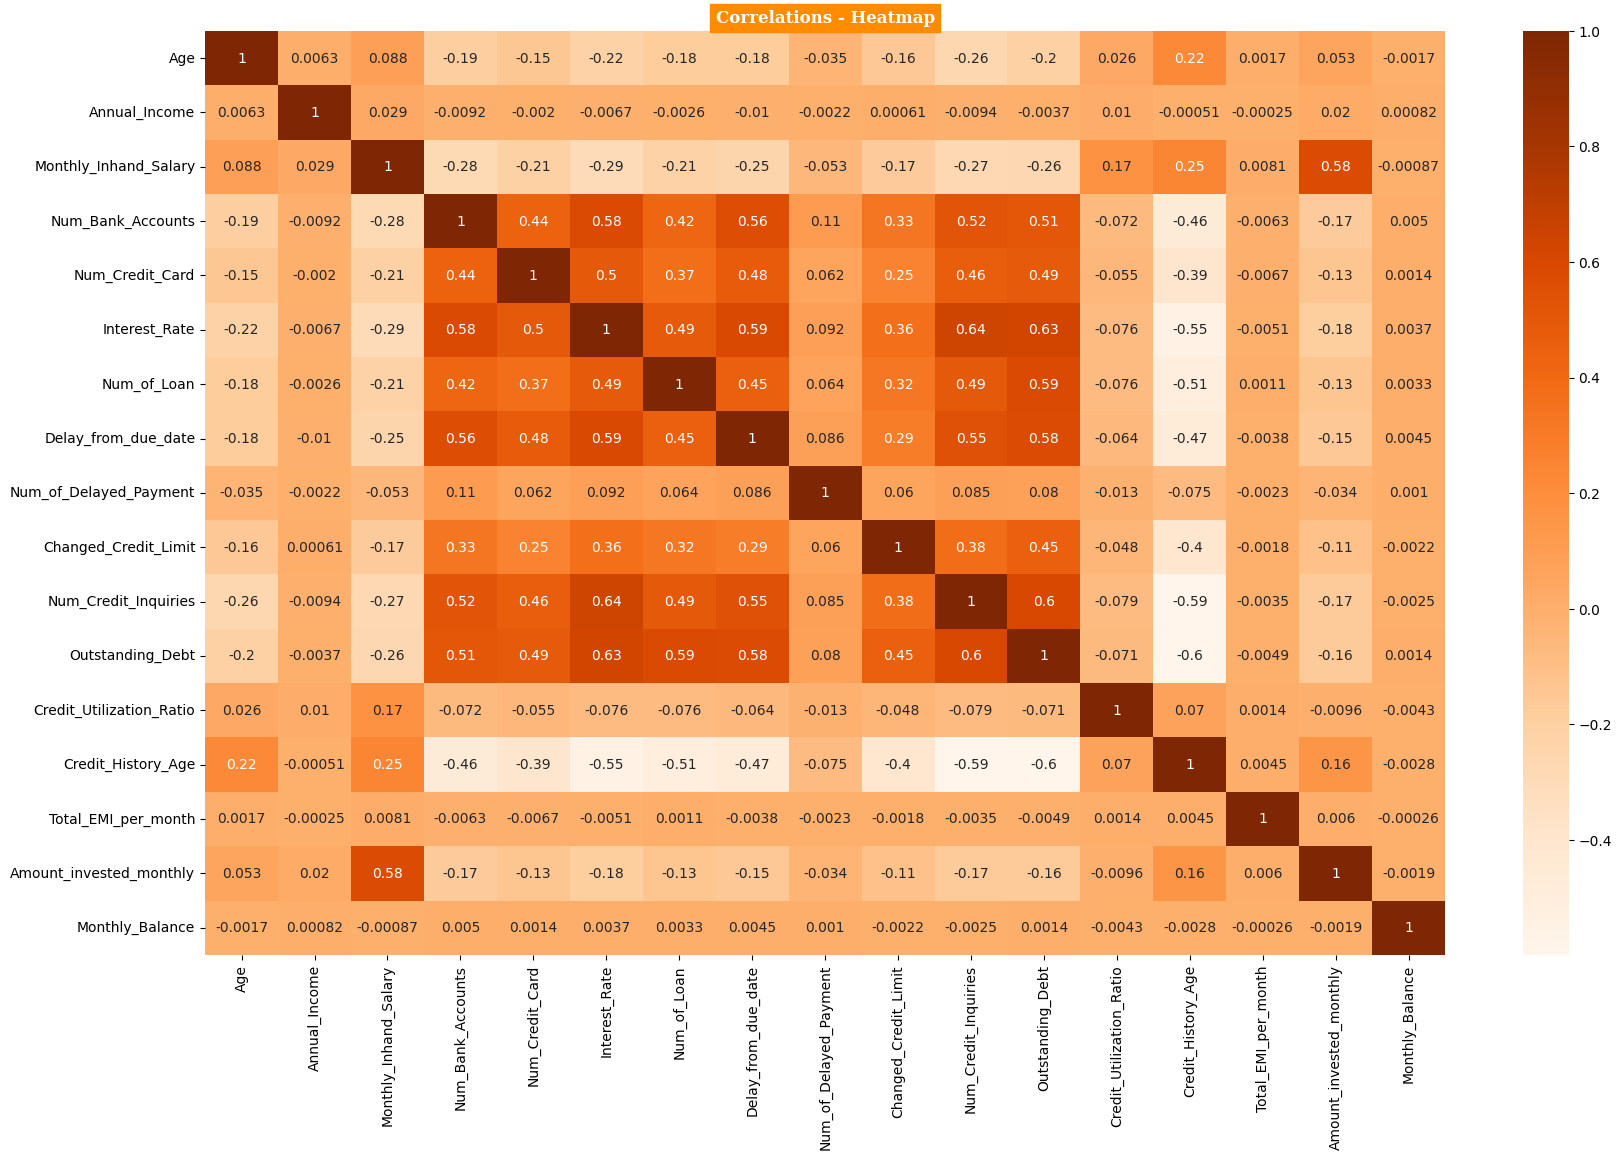

In [613]:
plt.figure(figsize=(20,12))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='Oranges')
plt.title('Correlations - Heatmap',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='darkorange',color='w')
plt.show()

##### 🕵🏼‍♂️Insights

> **Strong Correlation with Monthly Inhand Salary and Investing**:
   - **Monthly Inhand Salary** shows a strong positive correlation with **Monthly Balance** (0.6597) and **Amount Invested Monthly** (0.5684), indicating that higher in-hand salary is associated with greater savings and investments.

> **Interest Rate and Credit Inquiries**:
   - **Interest Rate** is strongly correlated with **Num Credit Inquiries** (0.6385) and **Outstanding Debt** (0.6294), suggesting that customers with higher interest rates tend to have more credit inquiries and higher outstanding debt.

> **Num of Delayed Payments Impact**:
   - **Num of Delayed Payments** has a strong positive correlation with **Num of Bank Accounts** (0.6120) and **Delay from Due Date** (0.5556), indicating that customers with more bank accounts tend to delay payments more frequently.

> **Negative Impact on Credit History Age**:
   - **Credit History Age** has strong negative correlations with **Outstanding Debt** (-0.6285) and **Interest Rate** (-0.5755), implying that longer credit history is associated with lower debt and interest rates.

> **Moderate Correlation in Loan-related Metrics**:
   - **Num of Loans** is moderately correlated with **Interest Rate** (0.5592) and **Num Credit Inquiries** (0.5696), suggesting that customers with more loans tend to have higher interest rates and credit inquiries.

## 🧮**Feature Engineering**

In [614]:
dff = df.copy()

In [615]:
dff.head(8)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Month_Num
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.270000,4,Good,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.270000,4,Good,809.98,31.944960,22,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,10.389025,4,Good,809.98,28.609352,22,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,6.270000,4,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.270000,4,Good,809.98,24.797347,22,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,5
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,9.270000,4,Good,809.98,27.262259,22,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,6
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.270000,4,Good,809.98,22.537593,22,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,7
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,4,11.270000,4,Good,809.98,23.933795,22,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,8


### Feature creation

In [616]:
dff['Debt_to_Income_Ratio'] = dff['Outstanding_Debt'] / dff['Annual_Income']
dff['Total_Debt'] = dff['Outstanding_Debt'] + dff['Total_EMI_per_month']

In [617]:
payment_behaviour_mapping = {
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6,
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3
}

# Apply mapping
dff['Payment_Behaviour_Num'] = dff['Payment_Behaviour'].map(payment_behaviour_mapping)

In [618]:
dff['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [620]:
dff['Credit_Mix_num'] = dff['Credit_Mix'].map({'Good':2 , 'Standard':1, 'Bad':0})


In [ ]:
dff["Payment_History_Score"] = ( -1 * dff["Delay_from_due_date"]
                                -1 * dff["Num_of_Delayed_Payment"]
                                +1 * dff["Payment_of_Min_Amount"])

In [ ]:
dff.tail(8)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score
99992,CUS_0x942c,January,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,9.5,3,502.38,32.991333,31,0,35.104023,401.196481,189.641080,1,0.012677,537.484023,1,2,1007.82475,1,-29
99993,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,11.5,3,502.38,29.135447,31,0,58638.000000,180.733095,400.104466,2,0.012677,59140.380000,2,2,1007.82475,1,-29
99994,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,9.5,3,502.38,39.323569,31,0,35.104023,140.581403,410.256158,3,0.012677,537.484023,5,2,1007.82475,1,-29
99995,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,11.5,3,502.38,34.663572,31,0,35.104023,60.971333,479.866228,4,0.012677,537.484023,6,2,1007.82475,1,-29
99996,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,11.5,3,502.38,40.565631,31,0,35.104023,54.185950,496.651610,5,0.012677,537.484023,5,2,1007.82475,1,-29
99997,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,11.5,3,502.38,41.255522,31,0,35.104023,24.028477,516.809083,6,0.012677,537.484023,6,2,1007.82475,1,-29
99998,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,11.5,3,502.38,33.638208,31,0,35.104023,251.672582,319.164979,7,0.012677,537.484023,3,2,1007.82475,1,-29
99999,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,23,6,11.5,3,502.38,34.192463,31,0,35.104023,167.163865,393.673696,8,0.012677,537.484023,3,2,1007.82475,1,-29


In [621]:
dff['Payment_of_Min_Amount'].unique()

array(['No', 'Yes'], dtype=object)

In [622]:
dff['Payment_of_Min_Amount'] = dff['Payment_of_Min_Amount'].map({'Yes':1, 'No':0})

In [623]:
dff['Payment_of_Min_Amount'].isna().sum() , dff['Payment_of_Min_Amount'].unique()

(0, array([0, 1]))

In [624]:
dff['30%_of_Monthly_Salary'] = dff['Monthly_Inhand_Salary']*0.3

dff['ability to pay loan with saving'] = np.where(dff['30%_of_Monthly_Salary']>dff['Monthly_Balance'],1,0)

In [625]:
dff = dff.drop(columns=['ID','Type_of_Loan','Credit_Mix','Payment_Behaviour'],axis=1)

In [626]:
dff["Payment_History_Score"] = ( -1 * dff["Delay_from_due_date"]
                                -1 * dff["Num_of_Delayed_Payment"]
                                +1 * dff["Payment_of_Min_Amount"])

## ♾️**Hypothetical Credit_Score Computation**

### ⚖️ **Scaling**

In [627]:
scaling_features = dff.iloc[:, [3] + list(range(6, dff.shape[1]))].columns
scaling_features

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Month_Num',
       'Debt_to_Income_Ratio', 'Total_Debt', 'Payment_Behaviour_Num',
       'Credit_Mix_num', '30%_of_Monthly_Salary',
       'ability to pay loan with saving', 'Payment_History_Score'],
      dtype='object')

In [628]:
scaler = MinMaxScaler()
dff[scaling_features] = scaler.fit_transform(dff[scaling_features])

In [629]:
dff

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score
0,CUS_0xd40,January,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.227421,0.666667,0.0,0.000602,0.040669,1.0,0.000000,0.062021,0.009949,0.6,1.0,0.102087,1.0,0.998286
1,CUS_0xd40,February,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.398165,0.666667,0.0,0.000602,0.059818,1.0,0.142857,0.062021,0.009949,0.4,1.0,0.102087,1.0,0.998286
2,CUS_0xd40,March,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.388381,0.235294,0.162020,0.286978,0.666667,0.0,0.000602,0.041318,1.0,0.285714,0.062021,0.009949,0.2,1.0,0.102087,1.0,0.998286
3,CUS_0xd40,April,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.293603,0.235294,0.162020,0.379262,0.666667,0.0,0.000602,0.100873,1.0,0.428571,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286
4,CUS_0xd40,May,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.159912,0.666667,0.0,0.000602,0.020948,1.0,0.571429,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.488786,0.939394,0.0,0.000426,0.030835,1.0,0.428571,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899
99996,CUS_0x942c,May,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.685521,0.939394,0.0,0.000426,0.027404,1.0,0.571429,0.018553,0.006218,0.8,1.0,0.205072,1.0,0.992899
99997,CUS_0x942c,June,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.708517,0.939394,0.0,0.000426,0.012152,1.0,0.714286,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899
99998,CUS_0x942c,July,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.454607,0.939394,0.0,0.000426,0.127279,1.0,0.857143,0.018553,0.006218,0.4,1.0,0.205072,1.0,0.992899


##### 🕵🏼‍♂️Insights

* High_spent_Small_value_payments: Likely to indicate high spending habits with small payments, which might be risky if the behavior is consistent.
* High_spent_Medium_value_payments: Indicates high spending with medium payments, potentially a higher risk.
* High_spent_Large_value_payments: Shows high spending with large payments, which might indicate high financial risk.
* Low_spent_Small_value_payments: Shows low spending with small payments, likely less risky.
* Low_spent_Medium_value_payments: Low spending with medium payments, potentially moderate risk.
* Low_spent_Large_value_payments: Low spending with large payments, might be less risky but could indicate underutilization of credit.

## ♾️**Hypothetical Credit_Score Computation**

### ⚖️ **Scaling**

In [ ]:
scaling_features = dff.iloc[:, [3] + list(range(6, dff.shape[1]))].columns
scaling_features

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Month_Num',
       'Debt_to_Income_Ratio', 'Total_Debt', 'Payment_Behaviour_Num',
       'Credit_Mix_num', '30%_of_Monthly_Salary',
       'ability to pay loan with saving', 'Payment_History_Score'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
dff[scaling_features] = scaler.fit_transform(dff[scaling_features])

In [ ]:
dff

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score
0,CUS_0xd40,January,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.444444,0.048387,0.142857,0.408652,0.235294,0.162020,0.227421,0.666667,0.0,0.000602,0.040669,0.195060,0.000000,0.062021,0.009949,0.6,1.0,0.102087,1.0,0.919540
1,CUS_0xd40,February,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.444444,0.048387,0.142857,0.408652,0.235294,0.162020,0.398165,0.666667,0.0,0.000602,0.059818,0.177667,0.142857,0.062021,0.009949,0.4,1.0,0.102087,1.0,0.919540
2,CUS_0xd40,March,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.444444,0.048387,0.142857,0.408652,0.235294,0.162020,0.286978,0.666667,0.0,0.000602,0.041318,0.206743,0.285714,0.062021,0.009949,0.2,1.0,0.102087,1.0,0.919540
3,CUS_0xd40,April,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.444444,0.048387,0.142857,0.293603,0.235294,0.162020,0.379262,0.666667,0.0,0.000602,0.100873,0.139479,0.428571,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.919540
4,CUS_0xd40,May,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.444444,0.048387,0.142857,0.408652,0.235294,0.162020,0.159912,0.666667,0.0,0.000602,0.020948,0.213159,0.571429,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.919540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.222222,0.370968,0.214286,0.413944,0.176471,0.100473,0.488786,0.939394,0.0,0.000426,0.030835,0.299534,0.428571,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.666667
99996,CUS_0x942c,May,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.222222,0.370968,0.214286,0.413944,0.176471,0.100473,0.685521,0.939394,0.0,0.000426,0.027404,0.310012,0.571429,0.018553,0.006218,0.8,1.0,0.205072,1.0,0.666667
99997,CUS_0x942c,June,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.222222,0.370968,0.214286,0.413944,0.176471,0.100473,0.708517,0.939394,0.0,0.000426,0.012152,0.322594,0.714286,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.666667
99998,CUS_0x942c,July,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.222222,0.370968,0.214286,0.413944,0.176471,0.100473,0.454607,0.939394,0.0,0.000426,0.127279,0.199224,0.857143,0.018553,0.006218,0.4,1.0,0.205072,1.0,0.666667


In [630]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Customer_ID                      100000 non-null  object 
 1   Month                            100000 non-null  object 
 2   Name                             100000 non-null  object 
 3   Age                              100000 non-null  float64
 4   SSN                              100000 non-null  object 
 5   Occupation                       100000 non-null  object 
 6   Annual_Income                    100000 non-null  float64
 7   Monthly_Inhand_Salary            100000 non-null  float64
 8   Num_Bank_Accounts                100000 non-null  float64
 9   Num_Credit_Card                  100000 non-null  float64
 10  Interest_Rate                    100000 non-null  float64
 11  Num_of_Loan                      100000 non-null  float64
 12  Del

In [631]:
# Define new feature weights including RFM
weights = {
    'Payment_Behaviour_Num': 0.10,
    'Credit_Utilization_Ratio': 0.10,
    'Outstanding_Debt': 0.05,
    'ability to pay loan with saving':0.10,
    'Total_EMI_per_month': 0.10,
    'Num_Credit_Inquiries': 0.05,
    'Credit_History_Age': 0.10,
    'Monthly_Balance': 0.10,
    'Annual_Income': 0.05,
    'Num_Bank_Accounts': 0.05,
    'Credit_Mix_num': 0.05,
    'Payment_History_Score': 0.15
}

## ♾️**Hypothetical Credit_Score Computation**

### ⚖️ **Scaling**

In [633]:
scaling_features = dff.iloc[:, [3] + list(range(6, dff.shape[1]))].columns
scaling_features

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Month_Num',
       'Debt_to_Income_Ratio', 'Total_Debt', 'Payment_Behaviour_Num',
       'Credit_Mix_num', '30%_of_Monthly_Salary',
       'ability to pay loan with saving', 'Payment_History_Score'],
      dtype='object')

In [634]:
scaler = MinMaxScaler()
dff[scaling_features] = scaler.fit_transform(dff[scaling_features])

In [635]:
dff

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score
0,CUS_0xd40,January,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.227421,0.666667,0.0,0.000602,0.040669,1.0,0.000000,0.062021,0.009949,0.6,1.0,0.102087,1.0,0.998286
1,CUS_0xd40,February,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.398165,0.666667,0.0,0.000602,0.059818,1.0,0.142857,0.062021,0.009949,0.4,1.0,0.102087,1.0,0.998286
2,CUS_0xd40,March,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.388381,0.235294,0.162020,0.286978,0.666667,0.0,0.000602,0.041318,1.0,0.285714,0.062021,0.009949,0.2,1.0,0.102087,1.0,0.998286
3,CUS_0xd40,April,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.293603,0.235294,0.162020,0.379262,0.666667,0.0,0.000602,0.100873,1.0,0.428571,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286
4,CUS_0xd40,May,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.159912,0.666667,0.0,0.000602,0.020948,1.0,0.571429,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.488786,0.939394,0.0,0.000426,0.030835,1.0,0.428571,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899
99996,CUS_0x942c,May,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.685521,0.939394,0.0,0.000426,0.027404,1.0,0.571429,0.018553,0.006218,0.8,1.0,0.205072,1.0,0.992899
99997,CUS_0x942c,June,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.708517,0.939394,0.0,0.000426,0.012152,1.0,0.714286,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899
99998,CUS_0x942c,July,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.454607,0.939394,0.0,0.000426,0.127279,1.0,0.857143,0.018553,0.006218,0.4,1.0,0.205072,1.0,0.992899


In [636]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Customer_ID                      100000 non-null  object 
 1   Month                            100000 non-null  object 
 2   Name                             100000 non-null  object 
 3   Age                              100000 non-null  float64
 4   SSN                              100000 non-null  object 
 5   Occupation                       100000 non-null  object 
 6   Annual_Income                    100000 non-null  float64
 7   Monthly_Inhand_Salary            100000 non-null  float64
 8   Num_Bank_Accounts                100000 non-null  float64
 9   Num_Credit_Card                  100000 non-null  float64
 10  Interest_Rate                    100000 non-null  float64
 11  Num_of_Loan                      100000 non-null  float64
 12  Del

In [637]:
# Define new feature weights including RFM
weights = {
    'Payment_Behaviour_Num': 0.10,
    'Credit_Utilization_Ratio': 0.10,
    'Outstanding_Debt': 0.05,
    'ability to pay loan with saving':0.10,
    'Total_EMI_per_month': 0.10,
    'Num_Credit_Inquiries': 0.05,
    'Credit_History_Age': 0.10,
    'Monthly_Balance': 0.10,
    'Annual_Income': 0.05,
    'Num_Bank_Accounts': 0.05,
    'Credit_Mix_num': 0.05,
    'Payment_History_Score': 0.15
}

### <font color=orange>**Reasons for feature selection and its weightage -- Credit Score Computation**</font>

> **Outstanding_Debt:**
  - Represents the total debt owed. Significant outstanding debt can signal financial strain, impacting the ability to manage new credit.

> **Total_EMI_per_month:**
  - Indicates the total monthly payments towards loans. Helps assess the customer’s existing debt burden and financial obligations.

> **Num_Credit_Inquiries:**
  - Shows how frequently the customer has applied for credit. Frequent inquiries can suggest financial distress or a high demand for credit.

> **Credit_History_Age:**
  - Reflects the length of time the customer has maintained credit accounts. A longer credit history generally suggests more reliable credit behavior.

> **Monthly_Balance:**
  - Tracks the customer’s balance on a monthly basis. A consistently positive balance indicates stronger financial health and stability.

> **Annual_Income:**
  - Provides insight into the customer’s financial capacity. Higher income typically suggests a greater ability to manage and repay debt.

> **Num_Bank_Accounts:**
  - Reflects the number of bank accounts held. Multiple accounts can indicate effective financial management, although an excess might signal potential financial issues.

> **Credit_Mix_Num:**
  - Indicates the diversity of credit types held. A varied credit mix can positively influence creditworthiness, demonstrating the ability to manage different credit types.
  
> **Payment_Behaviour_Num:**
  - Captures payment habits, essential for assessing creditworthiness. Reflects factors like payment frequency and amounts, which are crucial for credit evaluation.

> **Credit_Utilization_Ratio:**
  - Measures the proportion of credit used relative to total credit available. A high ratio may indicate potential financial risk due to extensive credit usage.

> **Payment_history_score:**
  - Payments history plays a major role in determining the credit approval and hence heavy weightage.

In [638]:
dff['Credit_Score'] = dff.apply(lambda x: sum(x[feature] * weight for feature, weight in weights.items()), axis=1)

In [639]:
dff['Credit_Score'] = dff['Credit_Score'] * (850 - 300) + 300

In [640]:
dff[(dff['Credit_Score']<300) | (dff['Credit_Score']>850)]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score,Credit_Score


In [641]:
cs_df = dff[['Customer_ID','Name','SSN','Month','Credit_Score']]

### 🪢Aggregated data - Consolidated

In [642]:
cdf = cs_df.groupby(['Customer_ID','Name','SSN'])['Credit_Score'].mean().to_frame().round().astype(int).reset_index()
cdf.sample(10)

,Customer_ID,Name,SSN,Credit_Score
9850,CUS_0x9673,Alexeiz,713-38-9516,626
8622,CUS_0x8661,Ross Kerberh,887-22-9485,666
5375,CUS_0x5ac6,McBrideh,825-86-1844,630
10845,CUS_0xa3db,Euan Rochap,736-80-3805,604
4463,CUS_0x4e52,lew,983-62-4894,646
136,CUS_0x1232,Crawleyv,441-26-1297,583
7856,CUS_0x7bb2,Schnurrv,112-97-6129,600
7430,CUS_0x75d8,Mattv,281-84-3517,645
928,CUS_0x1e4d,Nicola Leskez,669-94-5422,596
8836,CUS_0x88fb,Angela Moonm,069-08-9575,605


In [643]:
bins = [300, 500, 600, 750, 800, 850]
bin_labels = ['very Bad','Poor', 'Fair', 'Good', 'Excellent']

# Apply binning
dff['Monthly_Credit_Score_category'] = pd.cut(dff['Credit_Score'], bins=bins, labels=bin_labels, right=True)

In [644]:
dff.head(8)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score,Credit_Score,Monthly_Credit_Score_category
0,CUS_0xd40,January,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.227421,0.666667,0.0,0.000602,0.040669,1.0,0.000000,0.062021,0.009949,0.6,1.0,0.102087,1.0,0.998286,621.256417,Fair
1,CUS_0xd40,February,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.398165,0.666667,0.0,0.000602,0.059818,1.0,0.142857,0.062021,0.009949,0.4,1.0,0.102087,1.0,0.998286,619.647375,Fair
2,CUS_0xd40,March,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.388381,0.235294,0.16202,0.286978,0.666667,0.0,0.000602,0.041318,1.0,0.285714,0.062021,0.009949,0.2,1.0,0.102087,1.0,0.998286,602.532093,Fair
3,CUS_0xd40,April,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.293603,0.235294,0.16202,0.379262,0.666667,0.0,0.000602,0.100873,1.0,0.428571,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,596.607695,Poor
4,CUS_0xd40,May,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.159912,0.666667,0.0,0.000602,0.020948,1.0,0.571429,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286,628.543417,Fair
5,CUS_0xd40,June,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.362632,0.235294,0.16202,0.242075,0.666667,0.0,0.000602,0.031573,1.0,0.714286,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,589.062422,Poor
6,CUS_0xd40,July,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.084586,0.666667,0.0,0.000602,0.090195,1.0,0.857143,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,580.400535,Poor
7,CUS_0xd40,August,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.131126,0.666667,0.0,0.000602,0.012535,1.0,1.000000,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286,626.960239,Fair


In [645]:
bins = [300, 500, 600, 750, 800, 850]
bin_labels = ['very Bad','Poor', 'Fair', 'Good', 'Excellent']

# Apply binning
cdf['overall_Credit_Score_category'] = pd.cut(dff['Credit_Score'], bins=bins, labels=bin_labels, right=True)

In [646]:
cdf.sample(10)

,Customer_ID,Name,SSN,Credit_Score,overall_Credit_Score_category
6825,CUS_0x6da9,Davidw,353-08-1853,624,Fair
8721,CUS_0x8793,Tetsushi Kajimotok,198-37-2258,595,Poor
12516,CUS_0xba21,Spetalnicke,156-60-0442,620,Fair
38,CUS_0x109f,Vellacottj,283-32-0255,631,Poor
5600,CUS_0x5ddd,Foo Yuno,236-19-1704,608,Fair
10771,CUS_0xa2cd,Matt Dailyf,670-07-0195,634,Poor
6683,CUS_0x6b94,Stanley Whitei,586-98-5524,625,Poor
4350,CUS_0x4d05,Hepherh,942-07-8132,632,Fair
8029,CUS_0x7e06,Li-mei Hoangb,013-51-5521,649,Fair
9378,CUS_0x8ff8,Michele Kambasg,765-92-4564,596,Fair


In [647]:
cdf.groupby('overall_Credit_Score_category')['Customer_ID'].nunique().to_frame()

,Customer_ID
overall_Credit_Score_category,
very Bad,3
Poor,4518
Fair,8397
Good,0
Excellent,0


In [648]:
cdf.overall_Credit_Score_category.value_counts()

,count
overall_Credit_Score_category,
Fair,8992
Poor,4732
very Bad,3
Good,0
Excellent,0


In [649]:
cdf.shape

(13727, 5)

In [650]:
cdf

,Customer_ID,Name,SSN,Credit_Score,overall_Credit_Score_category
0,CUS_0x1000,Alistair Barrf,913-74-1218,600,Fair
1,CUS_0x1009,Arunah,063-67-6938,629,Fair
2,CUS_0x100b,Shirboni,238-62-0395,612,Fair
3,CUS_0x1011,Schneyerh,793-05-8223,589,Poor
4,CUS_0x1013,Cameront,930-49-9615,612,Fair
...,...,...,...,...,...
13722,CUS_0xff3,Somervilled,726-35-5322,607,Fair
13723,CUS_0xff4,Poornimaf,655-05-7666,612,Fair
13724,CUS_0xff6,Shieldsb,541-92-8371,625,Fair
13725,CUS_0xffc,Brads,226-86-7294,618,Fair


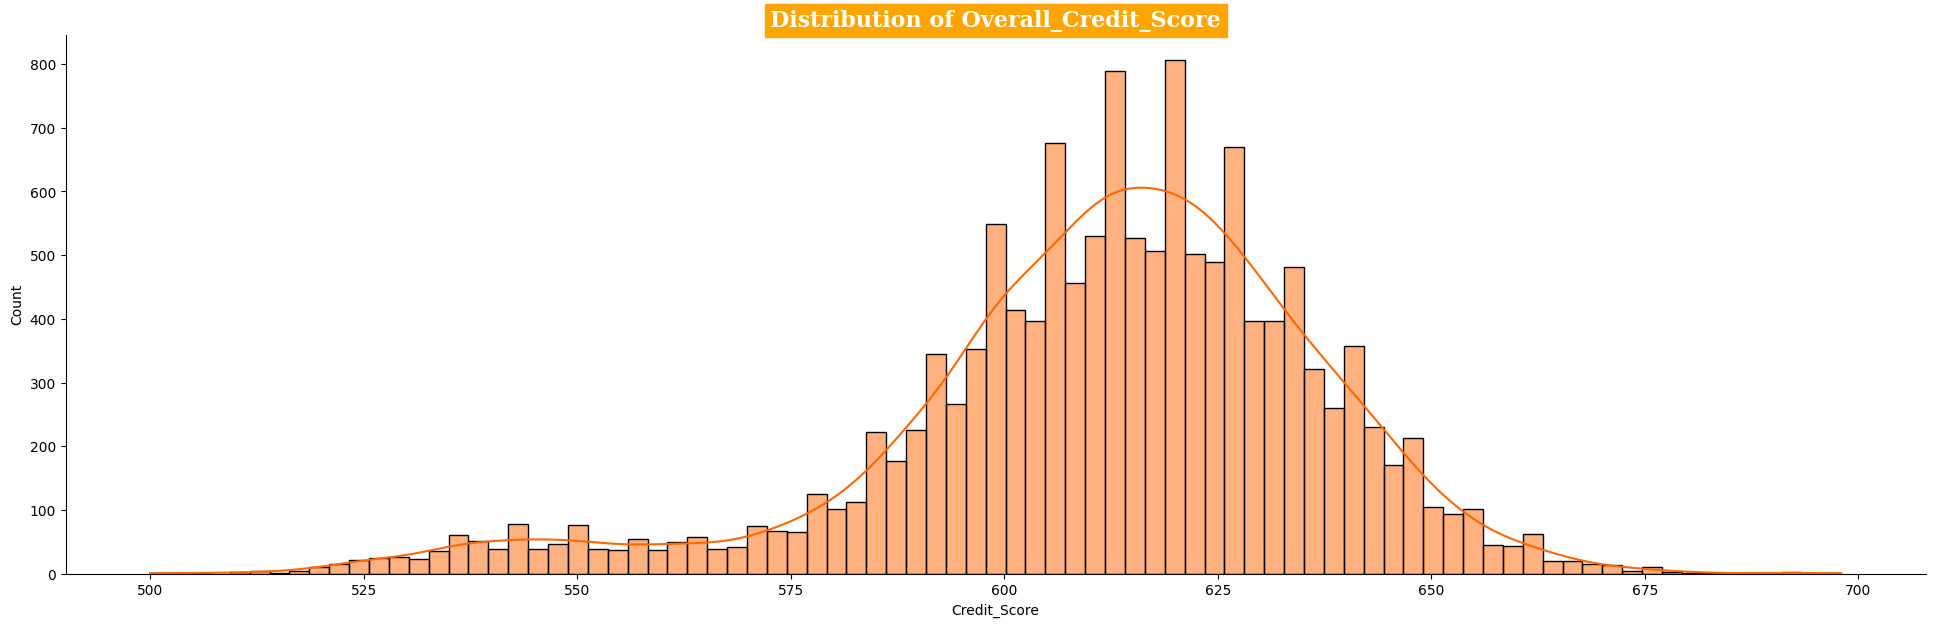

In [652]:
plt.figure(figsize=(24,7))
plt.title('Distribution of Overall_Credit_Score',fontsize=16,fontfamily='serif',fontweight='bold',backgroundcolor='orange',color='w')
sns.histplot(cdf['Credit_Score'],color=cp[6],kde=True)
sns.despine()
plt.show()

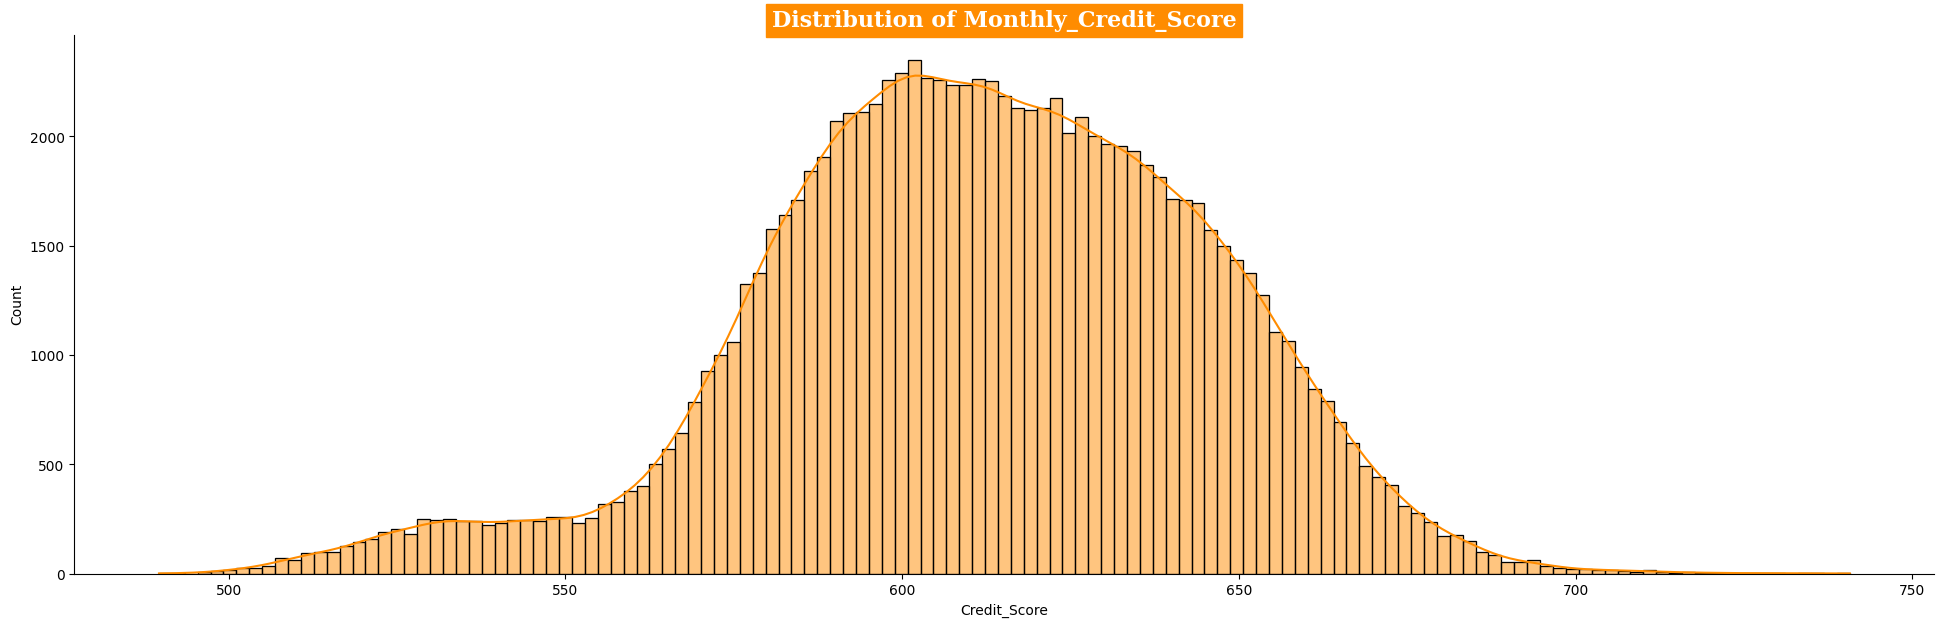

In [653]:
plt.figure(figsize=(24,7))
plt.title('Distribution of Monthly_Credit_Score',fontsize=16,fontfamily='serif',fontweight='bold',backgroundcolor='darkorange',color='w')
sns.histplot(dff['Credit_Score'],color=cp[8],kde=True)
sns.despine()
plt.show()

In [654]:
#cdf.to_csv('credit_scored_data.csv',index=False)

In [655]:
Fair_customers = cdf[cdf['overall_Credit_Score_category'] == 'Fair']
Fair_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_Score,8992.0,611.790258,25.459209,500.0,600.0,615.0,628.0,698.0


### <font color='orange'>**RFM Integration**</font>

In [657]:
dff['Recency'] = dff.groupby('Customer_ID')['Month_Num'].transform(lambda x: (x.max() - x))
dff['Frequency'] = dff.groupby('Customer_ID')['Num_of_Loan'].transform('max')
dff['Monetary'] = dff.groupby('Customer_ID')['Monthly_Balance'].transform('sum')

rfm_features = ['Recency', 'Frequency', 'Monetary']
dff[rfm_features] = scaler.fit_transform(dff[rfm_features])

In [658]:
dff

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score,Credit_Score,Monthly_Credit_Score_category,Recency,Frequency,Monetary
0,CUS_0xd40,January,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.227421,0.666667,0.0,0.000602,0.040669,1.0,0.000000,0.062021,0.009949,0.6,1.0,0.102087,1.0,0.998286,621.256417,Fair,1.000000,0.375,1.0
1,CUS_0xd40,February,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.398165,0.666667,0.0,0.000602,0.059818,1.0,0.142857,0.062021,0.009949,0.4,1.0,0.102087,1.0,0.998286,619.647375,Fair,0.857143,0.375,1.0
2,CUS_0xd40,March,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.388381,0.235294,0.162020,0.286978,0.666667,0.0,0.000602,0.041318,1.0,0.285714,0.062021,0.009949,0.2,1.0,0.102087,1.0,0.998286,602.532093,Fair,0.714286,0.375,1.0
3,CUS_0xd40,April,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.293603,0.235294,0.162020,0.379262,0.666667,0.0,0.000602,0.100873,1.0,0.428571,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,596.607695,Poor,0.571429,0.375,1.0
4,CUS_0xd40,May,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.162020,0.159912,0.666667,0.0,0.000602,0.020948,1.0,0.571429,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286,628.543417,Fair,0.428571,0.375,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.488786,0.939394,0.0,0.000426,0.030835,1.0,0.428571,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899,671.640555,Fair,0.571429,0.125,1.0
99996,CUS_0x942c,May,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.685521,0.939394,0.0,0.000426,0.027404,1.0,0.571429,0.018553,0.006218,0.8,1.0,0.205072,1.0,0.992899,671.460997,Fair,0.428571,0.125,1.0
99997,CUS_0x942c,June,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.708517,0.939394,0.0,0.000426,0.012152,1.0,0.714286,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899,683.725797,Fair,0.285714,0.125,1.0
99998,CUS_0x942c,July,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.454607,0.939394,0.0,0.000426,0.127279,1.0,0.857143,0.018553,0.006218,0.4,1.0,0.205072,1.0,0.992899,636.760721,Fair,0.142857,0.125,1.0


In [659]:
dff['Credit_Score_after_RFM'] = dff['Credit_Score'] + (dff['Recency'] * 0.1 + dff['Frequency'] * 0.1 + dff['Monetary'] * 0.1)

In [660]:
dff.tail(8)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score,Credit_Score,Monthly_Credit_Score_category,Recency,Frequency,Monetary,Credit_Score_after_RFM
99992,CUS_0x942c,January,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.367925,0.176471,0.100473,0.433044,0.939394,0.0,0.000426,0.202898,1.0,0.000000,0.018553,0.006218,0.0,1.0,0.205072,1.0,0.992899,613.574784,Fair,1.000000,0.125,1.0,613.787284
99993,CUS_0x942c,February,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.304515,0.939394,0.0,0.712223,0.091403,1.0,0.142857,0.018553,0.685098,0.2,1.0,0.205072,1.0,0.992899,656.654453,Fair,0.857143,0.125,1.0,656.852667
99994,CUS_0x942c,March,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.367925,0.176471,0.100473,0.644119,0.939394,0.0,0.000426,0.071097,1.0,0.285714,0.018553,0.006218,0.8,1.0,0.205072,1.0,0.992899,669.183884,Fair,0.714286,0.125,1.0,669.367812
99995,CUS_0x942c,April,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.488786,0.939394,0.0,0.000426,0.030835,1.0,0.428571,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899,671.640555,Fair,0.571429,0.125,1.0,671.810198
99996,CUS_0x942c,May,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.685521,0.939394,0.0,0.000426,0.027404,1.0,0.571429,0.018553,0.006218,0.8,1.0,0.205072,1.0,0.992899,671.460997,Fair,0.428571,0.125,1.0,671.616354
99997,CUS_0x942c,June,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.708517,0.939394,0.0,0.000426,0.012152,1.0,0.714286,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899,683.725797,Fair,0.285714,0.125,1.0,683.866869
99998,CUS_0x942c,July,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.454607,0.939394,0.0,0.000426,0.127279,1.0,0.857143,0.018553,0.006218,0.4,1.0,0.205072,1.0,0.992899,636.760721,Fair,0.142857,0.125,1.0,636.887507
99999,CUS_0x942c,August,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.473082,0.939394,0.0,0.000426,0.084540,1.0,1.000000,0.018553,0.006218,0.0,1.0,0.205072,1.0,0.992899,615.776855,Fair,0.000000,0.125,1.0,615.889355


In [661]:
bins = [300, 500, 600, 750, 800, 850]
bin_labels = ['very Bad','Poor', 'Fair', 'Good', 'Excellent']

# Apply binning
dff['RFM_Credit_Score_category'] = pd.cut(dff['Credit_Score_after_RFM'], bins=bins, labels=bin_labels, right=True)

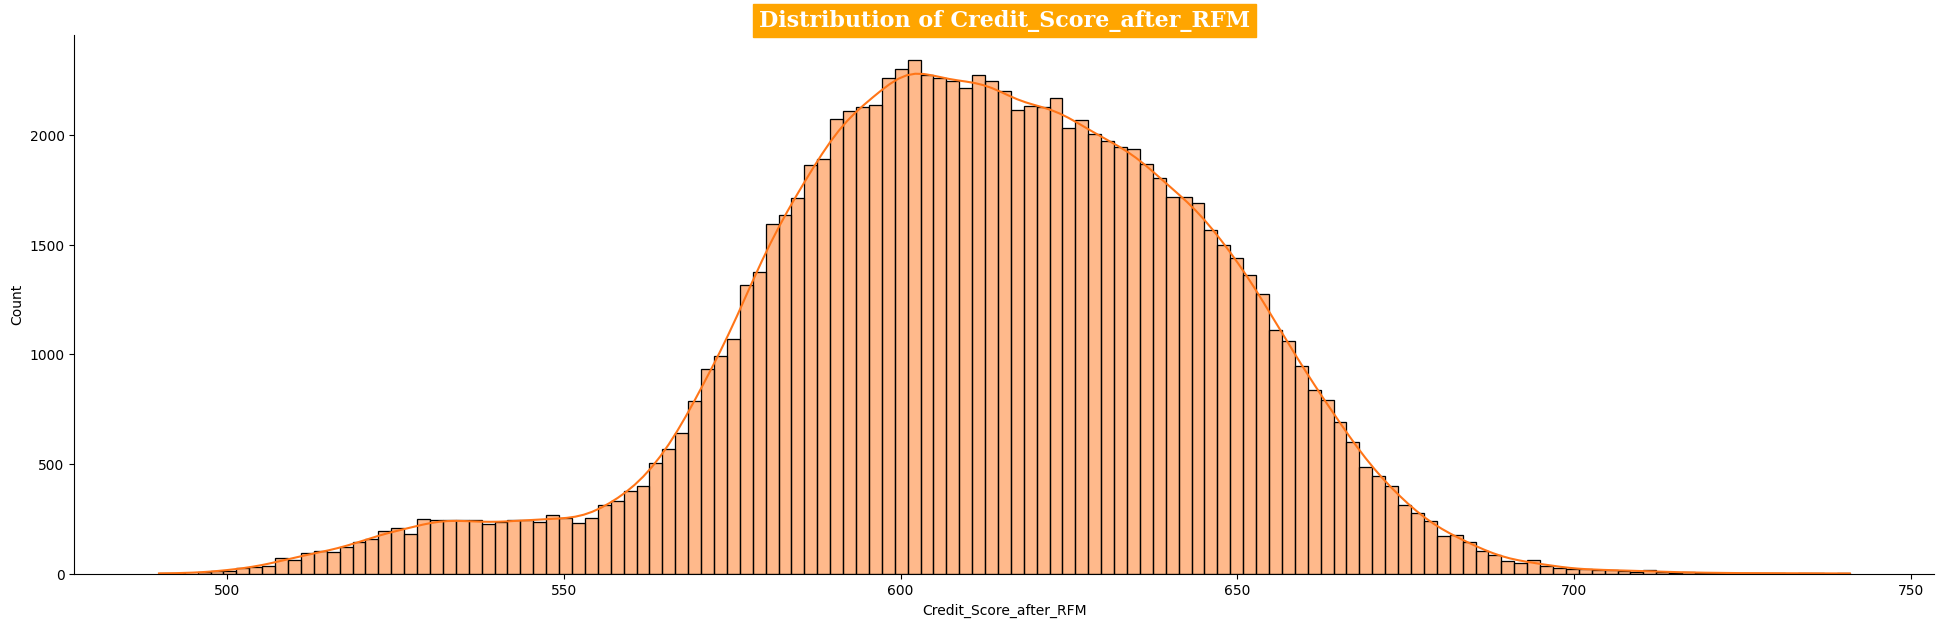

In [662]:
plt.figure(figsize=(24,7))
plt.title('Distribution of Credit_Score_after_RFM',fontsize=16,fontfamily='serif',fontweight='bold',backgroundcolor='orange',color='w')
sns.histplot(dff['Credit_Score_after_RFM'],color=cp[5],kde=True)
sns.despine()
plt.show()

In [664]:
dff.head(8)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score,Credit_Score,Monthly_Credit_Score_category,Recency,Frequency,Monetary,Credit_Score_after_RFM,RFM_Credit_Score_category
0,CUS_0xd40,January,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.227421,0.666667,0.0,0.000602,0.040669,1.0,0.000000,0.062021,0.009949,0.6,1.0,0.102087,1.0,0.998286,621.256417,Fair,1.000000,0.375,1.0,621.493917,Fair
1,CUS_0xd40,February,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.398165,0.666667,0.0,0.000602,0.059818,1.0,0.142857,0.062021,0.009949,0.4,1.0,0.102087,1.0,0.998286,619.647375,Fair,0.857143,0.375,1.0,619.870589,Fair
2,CUS_0xd40,March,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.388381,0.235294,0.16202,0.286978,0.666667,0.0,0.000602,0.041318,1.0,0.285714,0.062021,0.009949,0.2,1.0,0.102087,1.0,0.998286,602.532093,Fair,0.714286,0.375,1.0,602.741022,Fair
3,CUS_0xd40,April,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.293603,0.235294,0.16202,0.379262,0.666667,0.0,0.000602,0.100873,1.0,0.428571,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,596.607695,Poor,0.571429,0.375,1.0,596.802338,Poor
4,CUS_0xd40,May,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.159912,0.666667,0.0,0.000602,0.020948,1.0,0.571429,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286,628.543417,Fair,0.428571,0.375,1.0,628.723775,Fair
5,CUS_0xd40,June,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.362632,0.235294,0.16202,0.242075,0.666667,0.0,0.000602,0.031573,1.0,0.714286,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,589.062422,Poor,0.285714,0.375,1.0,589.228494,Poor
6,CUS_0xd40,July,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.084586,0.666667,0.0,0.000602,0.090195,1.0,0.857143,0.062021,0.009949,0.0,1.0,0.102087,1.0,0.998286,580.400535,Poor,0.142857,0.375,1.0,580.552321,Poor
7,CUS_0xd40,August,Aaron Maashoh,0.214286,821-00-0265,Scientist,0.000501,0.102087,0.3,0.363636,0.060606,0.375,0.048387,0.001717,0.408652,0.235294,0.16202,0.131126,0.666667,0.0,0.000602,0.012535,1.0,1.000000,0.062021,0.009949,0.8,1.0,0.102087,1.0,0.998286,626.960239,Fair,0.000000,0.375,1.0,627.097739,Fair


In [665]:
dff.groupby('RFM_Credit_Score_category')['Customer_ID'].nunique().to_frame()

,Customer_ID
RFM_Credit_Score_category,
very Bad,18
Poor,10146
Fair,11756
Good,0
Excellent,0


In [666]:
cdff = dff.groupby('Customer_ID')['Credit_Score_after_RFM'].mean().to_frame().reset_index()
cdff

,Customer_ID,Credit_Score_after_RFM
0,CUS_0x1000,599.998844
1,CUS_0x1009,629.609740
2,CUS_0x100b,612.366418
3,CUS_0x1011,588.947184
4,CUS_0x1013,612.017486
...,...,...
12495,CUS_0xff3,607.202954
12496,CUS_0xff4,612.638219
12497,CUS_0xff6,625.423775
12498,CUS_0xffc,618.087888


In [667]:
bins = [300, 500, 650, 750, 800, 850]
bin_labels = ['very Bad','Poor', 'Fair', 'Good', 'Excellent']

# Apply binning
cdff['cumulative_RFM_Credit_Score_category'] = pd.cut(cdff['Credit_Score_after_RFM'], bins=bins, labels=bin_labels, right=True)

In [668]:
cdff.sample(6)

,Customer_ID,Credit_Score_after_RFM,cumulative_RFM_Credit_Score_category
10587,CUS_0xae17,606.558688,Poor
7131,CUS_0x7ae4,624.956418,Poor
7635,CUS_0x828b,607.916627,Poor
12321,CUS_0xd46,635.633554,Poor
3291,CUS_0x434a,600.163275,Poor
11284,CUS_0xb82d,602.720055,Poor


In [669]:
cdff.groupby('cumulative_RFM_Credit_Score_category')['Customer_ID'].nunique().to_frame()

,Customer_ID
cumulative_RFM_Credit_Score_category,
very Bad,0
Poor,12114
Fair,386
Good,0
Excellent,0


### 🕵🏼‍♂️ Insights

* After applying RFM analysis, there are noticeable differences in creditworthiness across different customer segments. The categorization of customers has shifted, indicating that the influence of RFM analysis has led to changes in the classification of creditworthiness, even with the bins being set consistently across the board.

> This insight highlights the dynamic nature of creditworthiness assessment when influenced by RFM, emphasizing how customer segmentation can change based on different metrics.

### <font color=#FF8C00>**3 Months - Transaction Period Analysis**</font>

> Analyze how credit scores and aggregated features change over the last 3 to 6 months to understand the temporal dynamics of creditworthiness.  
Lets consider `Last 3 months`.

In [670]:
months = ['June', 'July', 'August']

filtered_dff = dff[dff['Month'].isin(months)]

In [671]:
filtered_dff.shape

(37500, 38)

In [672]:
filtered_dff.tail(6)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Debt_to_Income_Ratio,Total_Debt,Payment_Behaviour_Num,Credit_Mix_num,30%_of_Monthly_Salary,ability to pay loan with saving,Payment_History_Score,Credit_Score,Monthly_Credit_Score_category,Recency,Frequency,Monetary,Credit_Score_after_RFM,RFM_Credit_Score_category
99989,CUS_0x8600,June,Sarah McBridec,0.333333,031-35-0942,Architect,0.000537,0.109138,1.0,0.727273,0.848485,0.500,0.532258,0.006866,0.524620,0.529412,0.714603,0.445333,0.181818,1.0,0.000740,0.037610,1.0,0.714286,0.261337,0.042073,0.0,0.0,0.109138,1.0,0.986043,587.607765,Poor,0.285714,0.500,1.0,587.786336,Poor
99990,CUS_0x8600,July,Sarah McBridec,0.333333,031-35-0942,Architect,0.000537,0.109138,1.0,0.727273,0.848485,0.500,0.532258,0.006866,0.570640,0.529412,0.714603,0.170784,0.181818,1.0,0.000740,0.087631,1.0,0.857143,0.261337,0.042073,0.4,0.0,0.109138,1.0,0.986043,594.507602,Poor,0.142857,0.500,1.0,594.671888,Poor
99991,CUS_0x8600,August,Sarah McBridec,0.333333,031-35-0942,Architect,0.000537,0.109138,1.0,0.727273,0.848485,0.500,0.532258,0.006866,0.570640,0.529412,0.714603,0.571359,0.181818,1.0,0.000740,0.017530,1.0,1.000000,0.261337,0.042073,1.0,0.0,0.109138,1.0,0.986043,649.539224,Fair,0.000000,0.500,1.0,649.689224,Fair
99997,CUS_0x942c,June,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.708517,0.939394,0.0,0.000426,0.012152,1.0,0.714286,0.018553,0.006218,1.0,1.0,0.205072,1.0,0.992899,683.725797,Fair,0.285714,0.125,1.0,683.866869,Fair
99998,CUS_0x942c,July,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.454607,0.939394,0.0,0.000426,0.127279,1.0,0.857143,0.018553,0.006218,0.4,1.0,0.205072,1.0,0.992899,636.760721,Fair,0.142857,0.125,1.0,636.887507,Fair
99999,CUS_0x942c,August,Nicks,0.261905,078-73-5990,Mechanic,0.001349,0.205072,0.4,0.545455,0.181818,0.125,0.370968,0.002207,0.413944,0.176471,0.100473,0.473082,0.939394,0.0,0.000426,0.084540,1.0,1.000000,0.018553,0.006218,0.0,1.0,0.205072,1.0,0.992899,615.776855,Fair,0.000000,0.125,1.0,615.889355,Fair


In [674]:
fdf = filtered_dff[['Customer_ID','Name','Credit_Score','Monthly_Credit_Score_category','Credit_Score_after_RFM','RFM_Credit_Score_category']]
fdf

,Customer_ID,Name,Credit_Score,Monthly_Credit_Score_category,Credit_Score_after_RFM,RFM_Credit_Score_category
5,CUS_0xd40,Aaron Maashoh,589.062422,Poor,589.228494,Poor
6,CUS_0xd40,Aaron Maashoh,580.400535,Poor,580.552321,Poor
7,CUS_0xd40,Aaron Maashoh,626.960239,Fair,627.097739,Fair
13,CUS_0x21b1,Rick Rothackerj,656.497798,Fair,656.626370,Fair
14,CUS_0x21b1,Rick Rothackerj,641.374066,Fair,641.488352,Fair
...,...,...,...,...,...,...
99990,CUS_0x8600,Sarah McBridec,594.507602,Poor,594.671888,Poor
99991,CUS_0x8600,Sarah McBridec,649.539224,Fair,649.689224,Fair
99997,CUS_0x942c,Nicks,683.725797,Fair,683.866869,Fair
99998,CUS_0x942c,Nicks,636.760721,Fair,636.887507,Fair


In [675]:
fdf['diff'] = fdf['Credit_Score_after_RFM'] - fdf['Credit_Score']

In [676]:
fdf

,Customer_ID,Name,Credit_Score,Monthly_Credit_Score_category,Credit_Score_after_RFM,RFM_Credit_Score_category,diff
5,CUS_0xd40,Aaron Maashoh,589.062422,Poor,589.228494,Poor,0.166071
6,CUS_0xd40,Aaron Maashoh,580.400535,Poor,580.552321,Poor,0.151786
7,CUS_0xd40,Aaron Maashoh,626.960239,Fair,627.097739,Fair,0.137500
13,CUS_0x21b1,Rick Rothackerj,656.497798,Fair,656.626370,Fair,0.128571
14,CUS_0x21b1,Rick Rothackerj,641.374066,Fair,641.488352,Fair,0.114286
...,...,...,...,...,...,...,...
99990,CUS_0x8600,Sarah McBridec,594.507602,Poor,594.671888,Poor,0.164286
99991,CUS_0x8600,Sarah McBridec,649.539224,Fair,649.689224,Fair,0.150000
99997,CUS_0x942c,Nicks,683.725797,Fair,683.866869,Fair,0.141071
99998,CUS_0x942c,Nicks,636.760721,Fair,636.887507,Fair,0.126786


In [677]:
fdf[(fdf['diff']>1) | (fdf['diff']<0)]

,Customer_ID,Name,Credit_Score,Monthly_Credit_Score_category,Credit_Score_after_RFM,RFM_Credit_Score_category,diff


✍🏼***Observation:***

* There is a very minute difference when it comes to monthwise credit score with RFM.

In [679]:
fdf['Last_3_months_Credit_Score_consolidated'] = fdf.groupby(['Customer_ID', 'Name'])['Credit_Score'].transform('mean')

In [680]:
fdf

,Customer_ID,Name,Credit_Score,Monthly_Credit_Score_category,Credit_Score_after_RFM,RFM_Credit_Score_category,diff,Last_3_months_Credit_Score_consolidated
5,CUS_0xd40,Aaron Maashoh,589.062422,Poor,589.228494,Poor,0.166071,598.807732
6,CUS_0xd40,Aaron Maashoh,580.400535,Poor,580.552321,Poor,0.151786,598.807732
7,CUS_0xd40,Aaron Maashoh,626.960239,Fair,627.097739,Fair,0.137500,598.807732
13,CUS_0x21b1,Rick Rothackerj,656.497798,Fair,656.626370,Fair,0.128571,632.849960
14,CUS_0x21b1,Rick Rothackerj,641.374066,Fair,641.488352,Fair,0.114286,632.849960
...,...,...,...,...,...,...,...,...
99990,CUS_0x8600,Sarah McBridec,594.507602,Poor,594.671888,Poor,0.164286,610.551530
99991,CUS_0x8600,Sarah McBridec,649.539224,Fair,649.689224,Fair,0.150000,610.551530
99997,CUS_0x942c,Nicks,683.725797,Fair,683.866869,Fair,0.141071,645.421124
99998,CUS_0x942c,Nicks,636.760721,Fair,636.887507,Fair,0.126786,645.421124


In [681]:
bins = [300, 500, 650, 750, 800, 850]
bin_labels = ['very Bad','Poor', 'Fair', 'Good', 'Excellent']
fdf['last_3_months_Credit_Score_category'] = pd.cut(fdf['Last_3_months_Credit_Score_consolidated'], bins=bins, labels=bin_labels, right=True)

In [682]:
l3m = fdf[['Customer_ID','Name','Last_3_months_Credit_Score_consolidated','last_3_months_Credit_Score_category']]

In [683]:
l3m_unique = l3m.drop_duplicates(subset=['Customer_ID', 'Name'], keep='first')

In [684]:
l3m_unique.sample(10)

,Customer_ID,Name,Last_3_months_Credit_Score_consolidated,last_3_months_Credit_Score_category
53269,CUS_0x6f40,Soyoungv,621.333072,Poor
92253,CUS_0x165e,Schnurrn,610.664615,Poor
81941,CUS_0x2b58,Annn,607.402504,Poor
72789,CUS_0x242d,rag,614.633724,Poor
20989,CUS_0x16be,Agnieszkac,589.155682,Poor
20093,CUS_0x7d83,Dasguptaj,631.356417,Poor
52749,CUS_0x1fae,Tomy,591.623505,Poor
90277,CUS_0x5862,Economics Correspondentf,600.140616,Poor
82133,CUS_0xb915,Hiratan,626.945927,Poor
33597,CUS_0x38c0,Abhishekx,600.248460,Poor


In [685]:
l3m_unique.groupby('last_3_months_Credit_Score_category')['Customer_ID'].nunique().to_frame()

,Customer_ID
last_3_months_Credit_Score_category,
very Bad,0
Poor,11795
Fair,705
Good,0
Excellent,0


In [686]:
import plotly.graph_objects as go

credit_score_input = int(input('Enter your Credit Score - '))

# Define the gauge plot
fig = go.Figure(go.Indicator(
    mode="gauge+number+delta",
    value=credit_score_input,
    title={'text': "Credit Score"},
    delta={'reference': 850, 'increasing': {'color': "green"}},
    gauge={
        'axis': {'range': [300, 850], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'steps': [
            {'range': [300, 550], 'color': 'red'},
            {'range': [550, 650], 'color': 'orange'},
            {'range': [650, 750], 'color': 'yellow'},
            {'range': [750, 850], 'color': 'green'}],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': credit_score_input}}))

fig.update_layout(
    title="Based on your Credit Score",
    font={'color': "royalblue", 'family': "Arial"},
)

fig.show()

Enter your Credit Score - 674
